# 기본 세팅

## 폰트 설정

In [1]:
%cd C:\\Users\\User\\Desktop\\boot camp

C:\Users\User\Desktop\boot camp


In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')


In [3]:
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
 print(mpl.font_manager.FontProperties(fname=font).get_name())
 mpl.font_manager.fontManager.addfont(font)

NanumBarunGothicOTF YetHangul
Noto Sans KR
D2Coding ligature
NanumSquare Neo Light
Noto Sans KR
NanumMyeongjo
NanumBarunGothic
NanumSquareRoundOTF
NanumMyeongjo YetHangul
NanumSquare_ac
NanumSquareRound
NanumSquare Neo Regular
NanumBarunpenOTF
NanumMyeongjo Eco
Nanum Brush Script
Noto Sans KR
NanumBarunpen
NanumMyeongjoOTF Eco
Noto Sans KR
NanumSquare
NanumSquareRound
NanumBarunpenOTF
NanumBarunGothic
NanumGothic
D2Coding ligature
NanumSquareOTF_ac
NanumGothic
NanumMyeongjoOTF Eco
Nanum Pen Script
NanumSquare Neo OTF Bold
NanumSquare Neo OTF Regular
NanumBarunGothic
NanumSquareRound
NanumSquare Neo OTF ExtraBold
NanumGothicOTF
NanumSquareOTF_ac
NanumBarunGothicOTF
NanumSquare_ac
NanumBarunGothicOTF
Nanum Brush Script OTF
NanumSquareOTF
NanumSquareOTF
Noto Sans KR
NanumGothicOTF
NanumGothicOTF
NanumMyeongjoOTF
NanumMyeongjo
NanumMyeongjo
NanumGothicOTF Eco
NanumMyeongjoOTF YetHangul
NanumGothic Eco
NanumMyeongjoOTF
NanumSquareRound
NanumSquare Neo OTF Heavy
NanumBarunGothic
NanumMyeongj

In [4]:
# 시스템 폰트 경로 리스트
font_list = mpl.font_manager.findSystemFonts()
print(font_list)
# 폰트 설정하기
prop = mpl.font_manager.FontProperties(fname='원하는 폰트 경로')
plt.rcParams['font.family'] = prop.get_family()

['C:\\Windows\\Fonts\\WINGDNG2.TTF', 'C:\\Windows\\Fonts\\GOTHICBI.TTF', 'C:\\Windows\\Fonts\\comic.ttf', 'C:\\Windows\\Fonts\\YuGothL.ttc', 'C:\\Windows\\Fonts\\taile.ttf', 'C:\\Windows\\Fonts\\symbol.ttf', 'C:\\Windows\\Fonts\\GARAIT.TTF', 'C:\\Windows\\Fonts\\HMFMOLD.TTF', 'C:\\Windows\\Fonts\\ntailu.ttf', 'C:\\Windows\\Fonts\\arial.ttf', 'C:\\Windows\\Fonts\\javatext.ttf', 'C:\\Windows\\Fonts\\HANDotumB.ttf', 'C:\\Windows\\Fonts\\segoesc.ttf', 'C:\\Windows\\Fonts\\ANTQUABI.TTF', 'C:\\Windows\\Fonts\\segoeuii.ttf', 'C:\\Windows\\Fonts\\BOOKOSB.TTF', 'C:\\Windows\\Fonts\\seguiemj.ttf', 'C:\\Windows\\Fonts\\H2GPRM.TTF', 'C:\\Windows\\Fonts\\wingding.ttf', 'C:\\Windows\\Fonts\\malgunbd.ttf', 'C:\\Windows\\Fonts\\Inkfree.ttf', 'C:\\Windows\\Fonts\\timesi.ttf', 'C:\\Windows\\Fonts\\monbaiti.ttf', 'C:\\Windows\\Fonts\\ariali.ttf', 'C:\\Windows\\Fonts\\l_10646.ttf', 'C:\\Windows\\Fonts\\cambriab.ttf', 'C:\\Windows\\Fonts\\impact.ttf', 'C:\\Windows\\Fonts\\simsunb.ttf', 'C:\\Windows\\Fonts\

In [5]:
# Set font family globally
mpl.rcParams['font.family'] = 'Noto Sans KR'
print(mpl.rcParams['font.family'])

['Noto Sans KR']


## 데이터 로드

In [6]:
import easydict
args = easydict.EasyDict() #dict values 에 .으로 접근 가능하다 

# path 정보
args.default_path = 'C:\\Users\\User\\Desktop\\' # 파일 위치 
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'
args.default_submission_csv = args.default_path+'submission.csv'

args.submission_csv = args.default_path+'submission0407.csv' # 새로운 파일 
args.save_results = args.default_path+"model_results.csv" # 정보저장 파일 

# 데이터 분석을 위한 변수들
args.random_state = 42
args.results = []

In [7]:
ori_result = pd.read_csv(args.save_results)
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)
ori_train.shape, ori_test.shape

((916, 12), (393, 11))

In [8]:
ori_result

,model,score_tr,score_te,auc_te,ori_te_pred,len_features,feaute_importances,create_dt
0,modelV6,0.921997,0.854545,0.912,[0.93210988 0.92724436 0.9533418 0.08117021 0...,10,"['gender_female', 'gender_infant_male_0', 'gen...",407


# 데이터 확인 

In [9]:
ori_train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [10]:
ori_train.head(2)

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.875,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.750,NaN,Q


In [11]:
ori_test.columns # survived 가 빠짐 

Index(['passengerid', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [12]:
ori_test.head(2)

,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
1,917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S


# train_test_split


In [13]:
ori_tr = ori_train.copy()
ori_te = ori_test.copy()

ori_tr.shape, ori_te.shape

((916, 12), (393, 11))

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train, test = train_test_split(ori_train, test_size=0.3, stratify=ori_train['survived'], random_state=args.random_state)

train.shape, test.shape

((641, 12), (275, 12))

In [16]:
corr_all = train.corr()

<AxesSubplot:>

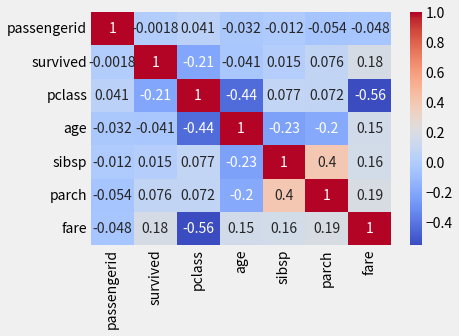

In [17]:
sns.heatmap(corr_all, annot=True, cmap='coolwarm')

# 전처리 시작

In [18]:
age_median = train['age'].median()
fare_median = train['fare'].median()
embarked_mode = train['embarked'].mode().values[0]

train['age'].fillna(age_median, inplace=True)
test['age'].fillna(age_median, inplace=True)
ori_te['age'].fillna(age_median, inplace=True)

train['fare'].fillna(fare_median, inplace=True)
test['fare'].fillna(fare_median, inplace=True)
ori_te['fare'].fillna(fare_median, inplace=True)

train['embarked'].fillna(embarked_mode, inplace=True)
test['embarked'].fillna(embarked_mode, inplace=True)
ori_te['embarked'].fillna(embarked_mode, inplace=True)

# train.isnull().sum().sum(), test.isnull().sum().sum(), ori_te.isnull().sum().sum()

In [19]:
train.drop(['ticket','cabin'], axis=1, inplace=True)

In [20]:
test.drop(['ticket','cabin'], axis=1, inplace=True)

In [21]:
ori_te.drop(['ticket','cabin'],axis=1,inplace=True)

In [22]:
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)
ori_te.reset_index(drop=True,inplace=True)

In [23]:
train.shape , test.shape , ori_te.shape

((641, 10), (275, 10), (393, 9))

In [24]:
age_median = train['age'].median()
fare_median = train['fare'].median()
embarked_mode = train['embarked'].mode().values[0]

age_median, fare_median, embarked_mode

(28.0, 14.5, 'S')

In [25]:
train['age'].fillna(age_median, inplace=True)
test['age'].fillna(age_median, inplace=True)
ori_te['age'].fillna(age_median, inplace=True)

train['fare'].fillna(fare_median, inplace=True)
test['fare'].fillna(fare_median, inplace=True)
ori_te['fare'].fillna(fare_median, inplace=True)

train['embarked'].fillna(embarked_mode, inplace=True)
test['embarked'].fillna(embarked_mode, inplace=True)
ori_te['embarked'].fillna(embarked_mode, inplace=True)


# EDA

## age feature

In [26]:
train.corr()

,passengerid,survived,pclass,age,sibsp,parch,fare
passengerid,1.000000,-0.001806,0.041179,-0.031160,-0.011624,-0.054474,-0.048175
survived,-0.001806,1.000000,-0.214195,-0.034229,0.015226,0.075825,0.176041
pclass,0.041179,-0.214195,1.000000,-0.408701,0.077389,0.071752,-0.555652
age,-0.031160,-0.034229,-0.408701,1.000000,-0.199523,-0.178265,0.148851
sibsp,-0.011624,0.015226,0.077389,-0.199523,1.000000,0.399212,0.161138
parch,-0.054474,0.075825,0.071752,-0.178265,0.399212,1.000000,0.189171
fare,-0.048175,0.176041,-0.555652,0.148851,0.161138,0.189171,1.000000


In [27]:
continous_cols = ['age', 'fare'] + ['survived'] # 연속형이랑 타겟만 따로 만듬

train[continous_cols].describe()
# survived 가 0.337535이니까 산사람 맞추는게 어려움 -> 따라서 산사람 맞추는 feature를 만드는게 좋음 

,age,fare,survived
count,641.000000,641.000000,641.000000
mean,29.512356,31.941796,0.377535
std,13.147607,47.068732,0.485149
min,0.170000,0.000000,0.000000
25%,22.000000,7.925000,0.000000
50%,28.000000,14.500000,0.000000
75%,35.000000,30.000000,1.000000
max,80.000000,512.329200,1.000000


In [28]:
corr =train[['fare','pclass','age']].corr()

<AxesSubplot:>

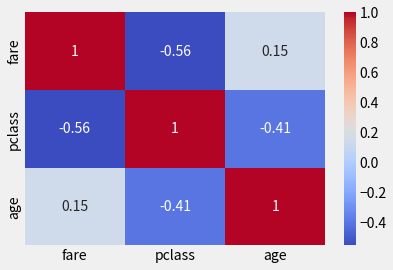

In [29]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

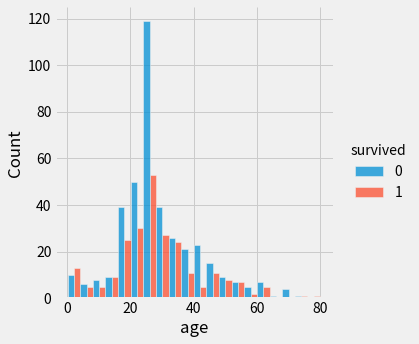

In [30]:
sns.displot(train, x='age', hue="survived", multiple="dodge", bins=20)
# 아이 세대만 죽은사람보다 산 사람이 많다

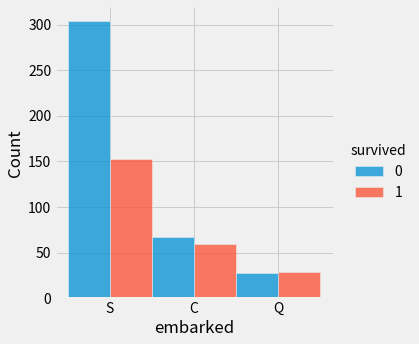

In [31]:
sns.displot(train, x='embarked', hue="survived", multiple="dodge", bins=20)
# 아이 세대만 죽은사람보다 산 사람이 많다

In [32]:
c1 = train['age'] <= 5
train.loc[c1]['survived'].mean() # 5보다 적은 나이사람들 생존 0, 1로 표현의 평균

0.6

In [33]:
c1 = train['age'] <= 10
c2 = train['age'] > 5
c = c1 & c2
train.loc[c]['survived'].mean() # 5~10살 사이의 사람들 생존 평균

0.3125

In [34]:
c3 = train['age'] > 5
train.loc[c3]['survived'].mean() 
# 5살보다 많은 사람들의 평균이 5보다 적은 사람들의 평균보다 생존이 훨 적다 

0.3685064935064935

### social

In [35]:
def social(age):
    if age <=19:
      result = '어린'
    elif (age >=20) & (age<=39):
      result = '사회초년생'
    else :
      result = '사회인'  
    return result

train['social'] = train['age'].map(lambda x: social(x))
test['social'] = test['age'].map(lambda x: social(x))
ori_te['social'] = ori_te['age'].map(lambda x: social(x))

### new_age

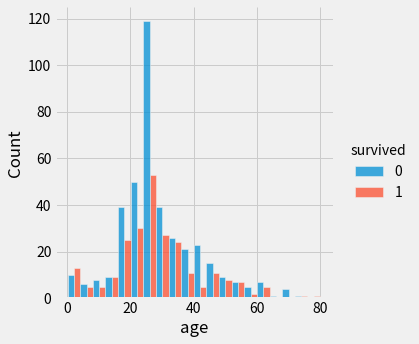

In [36]:
sns.displot(train, x="age", hue="survived", multiple="dodge",bins=20)

In [37]:
train['age'] = train['age'].astype('int')

In [38]:
train['age']

0      28
1      36
2      22
3      26
4      28
       ..
636    24
637    15
638    10
639    24
640    70
Name: age, Length: 641, dtype: int32

In [39]:
def add_new_age(age):
    if age <= 5   :
      result = '유아'
    elif (age>5) & (age <=12):
      result = '어린이'
    elif (age>12) & (age <=18):
      result = '청소년'
    elif (age>18) & (age <=39):
      result = '성인'
    elif (age>39) & (age <=49):
      result = '중년'
    elif (age>49) & (age <=64):
      result = '장년'
    else :
      result = '노인'
    return result

train['new_age'] = train['age'].map(lambda x: add_new_age(x))
test['new_age'] = test['age'].map(lambda x: add_new_age(x))
ori_te['new_age'] = ori_te['age'].map(lambda x: add_new_age(x))
train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,fare,embarked,social,new_age
0,539,0,1,"Klaber, Mr. Herman",male,28,0,0,26.5500,S,사회초년생,성인
1,339,1,1,"Young, Miss. Marie Grice",female,36,0,0,135.6333,C,사회초년생,성인
2,505,0,3,"Davies, Mr. Evan",male,22,0,0,8.0500,S,사회초년생,성인
3,492,0,3,"Kink, Mr. Vincenz",male,26,2,0,8.6625,S,사회초년생,성인
4,897,0,3,"Linehan, Mr. Michael",male,28,0,0,7.8792,Q,사회초년생,성인


#### gender_new_age

In [40]:
train['gender_new_age'] = train.apply(lambda row: row['gender']+'_'+row['new_age'], axis=1)
test['gender_new_age'] = test.apply(lambda row: row['gender']+'_'+row['new_age'], axis=1)
ori_te['gender_new_age'] = ori_te.apply(lambda row: row['gender']+'_'+row['new_age'], axis=1)

print(f"{train['gender_new_age'].nunique()} / \n {train['gender_new_age'].unique()} \n")

14 / 
 ['male_성인' 'female_성인' 'male_중년' 'female_중년' 'female_장년' 'male_청소년'
 'female_유아' 'male_어린이' 'female_청소년' 'female_어린이' 'male_장년' 'male_유아'
 'male_노인' 'female_노인'] 



#### pclass_new_age

In [41]:
train['pclass_new_age'] = train.apply(lambda row: str(row['pclass'])+'_'+row['new_age'], axis=1)
test['pclass_new_age'] = test.apply(lambda row: str(row['pclass'])+'_'+row['new_age'], axis=1)
ori_te['pclass_new_age'] = ori_te.apply(lambda row: str(row['pclass'])+'_'+row['new_age'], axis=1)

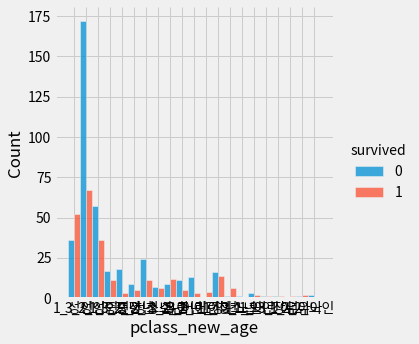

In [42]:
sns.displot(train, x="pclass_new_age", hue="survived", multiple="dodge", bins=20)

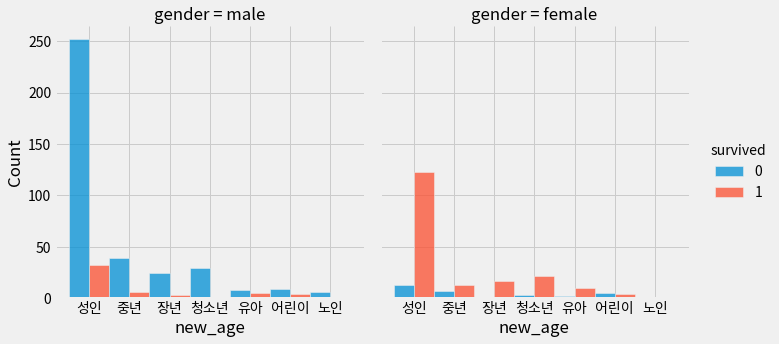

In [43]:
sns.displot(train, x="new_age", hue="survived", multiple="dodge", bins=20, col="gender")

In [44]:
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'fare', 'embarked', 'social', 'new_age', 'gender_new_age',
       'pclass_new_age'],
      dtype='object')

### infant

In [45]:
def add_infant(age):
  result = 0
  try:
    if age <= 5:
      result = 1
  except:
    pass
  return result

train['infant'] = train['age'].map(lambda x: add_infant(x))
test['infant'] = test['age'].map(lambda x: add_infant(x))
ori_te['infant'] = ori_te['age'].map(lambda x: add_infant(x))

print(f"{train['infant'].nunique()} / \n {train['infant'].unique()} \n")
train.shape, test.shape, ori_te.shape

2 / 
 [0 1] 



((641, 15), (275, 15), (393, 14))

#### gender_infant

In [46]:
train['gender_infant'] = train.apply(lambda row: row['gender']+'_'+str(row['infant']), axis=1)
test['gender_infant'] = test.apply(lambda row: row['gender']+'_'+str(row['infant']), axis=1)
ori_te['gender_infant'] = ori_te.apply(lambda row: row['gender']+'_'+str(row['infant']), axis=1)
# 성별과 5살 미만인지 유무에 따라 새로운 feature를 만듬 

print(f"{train['gender_infant'].nunique()} / \n {train['gender_infant'].unique()} \n")
train.shape, test.shape, ori_te.shape

4 / 
 ['male_0' 'female_0' 'female_1' 'male_1'] 



((641, 16), (275, 16), (393, 15))

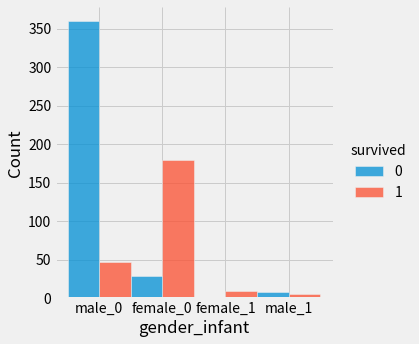

In [47]:
sns.displot(train, x="gender_infant", hue="survived", multiple="dodge")

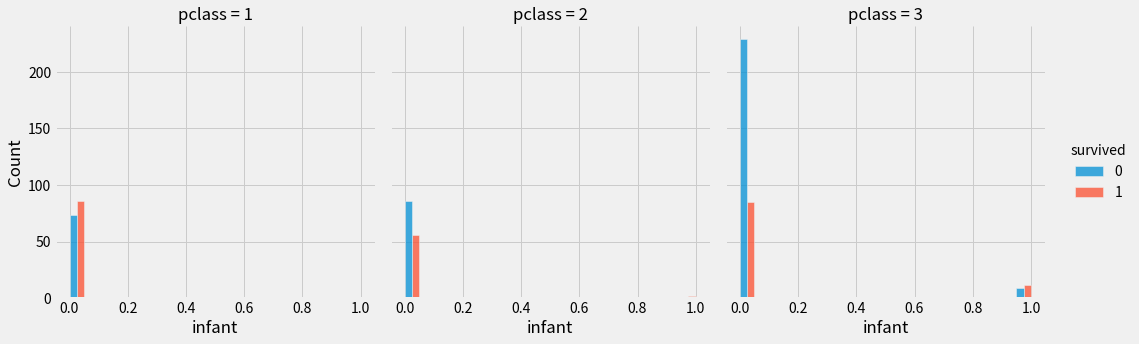

In [48]:
sns.displot(train, x="infant", hue="survived", multiple="dodge", bins=20, col="pclass")

## pcalss feature

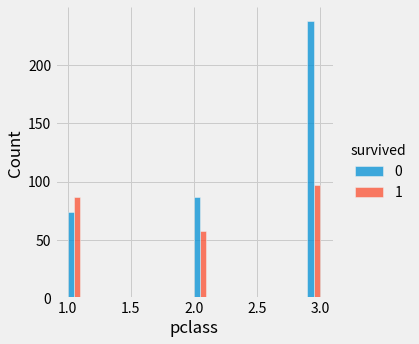

In [49]:
sns.displot(train, x="pclass", hue="survived", multiple="dodge", bins=20)

### pclass_1

In [50]:
def add_pclass_1(pclass):
  result = 'high pclass(1)'
  try:
    if pclass == 3 or pclass == 2 :
      result = 'low pcalss(2,3)'
  except:
    pass
  return result

In [51]:
train['pclass_1'] = train['pclass'].map(lambda x: add_pclass_1(x))
test['pclass_1'] = test['pclass'].map(lambda x: add_pclass_1(x))
ori_te['pclass_1'] = ori_te['pclass'].map(lambda x: add_pclass_1(x))

#### pclass_1_gender

In [52]:
train['pclass1_gender'] = train.apply(lambda row: row['gender']+'_'+row['pclass_1'], axis=1)
test['pclass1_gender'] = test.apply(lambda row: row['gender']+'_'+row['pclass_1'], axis=1)
ori_te['pclass1_gender'] = ori_te.apply(lambda row: row['gender']+'_'+row['pclass_1'], axis=1)

### pcalss_3

In [53]:
def add_pclass_3(pclass):
  result = 'high pcalss(3)'
  try:
    if pclass == 1 or pclass == 2 :
      result = 'low pcalss(1,2)'
  except:
    pass
  return result

In [54]:
train['pclass_3'] = train['pclass'].map(lambda x: add_pclass_3(x))
test['pclass_3'] = test['pclass'].map(lambda x: add_pclass_3(x))
ori_te['pclass_3'] = ori_te['pclass'].map(lambda x: add_pclass_3(x))

#### pecalss_3_infant

In [55]:
train['pclass3_infant'] = train.apply(lambda row: str(row['infant'])+'_'+row['pclass_3'], axis=1)
test['pclass3_infant'] = test.apply(lambda row: str(row['infant'])+'_'+row['pclass_3'], axis=1)
ori_te['pclass3_infant'] = ori_te.apply(lambda row: str(row['infant'])+'_'+row['pclass_3'], axis=1)

#### pcalss_3_gender

In [56]:
train['pclass3_gender'] = train.apply(lambda row: row['gender']+'_'+row['pclass_3'], axis=1)
test['pclass3_gender'] = test.apply(lambda row: row['gender']+'_'+row['pclass_3'], axis=1)
ori_te['pclass3_gender'] = ori_te.apply(lambda row: row['gender']+'_'+row['pclass_3'], axis=1)

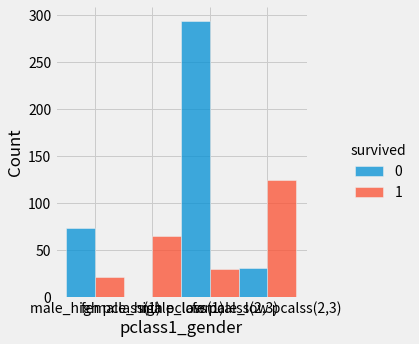

In [57]:
sns.displot(train, x="pclass1_gender", hue="survived", multiple="dodge")

In [58]:
train['pclass1_gender'].unique()

array(['male_high pclass(1)', 'female_high pclass(1)',
       'male_low pcalss(2,3)', 'female_low pcalss(2,3)'], dtype=object)

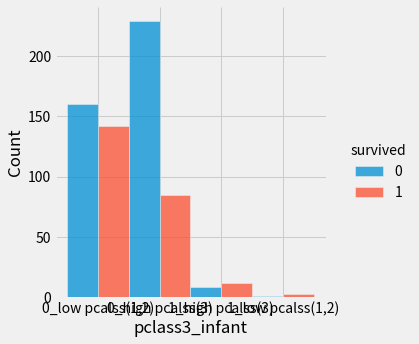

In [59]:
sns.displot(train, x="pclass3_infant", hue="survived", multiple="dodge")

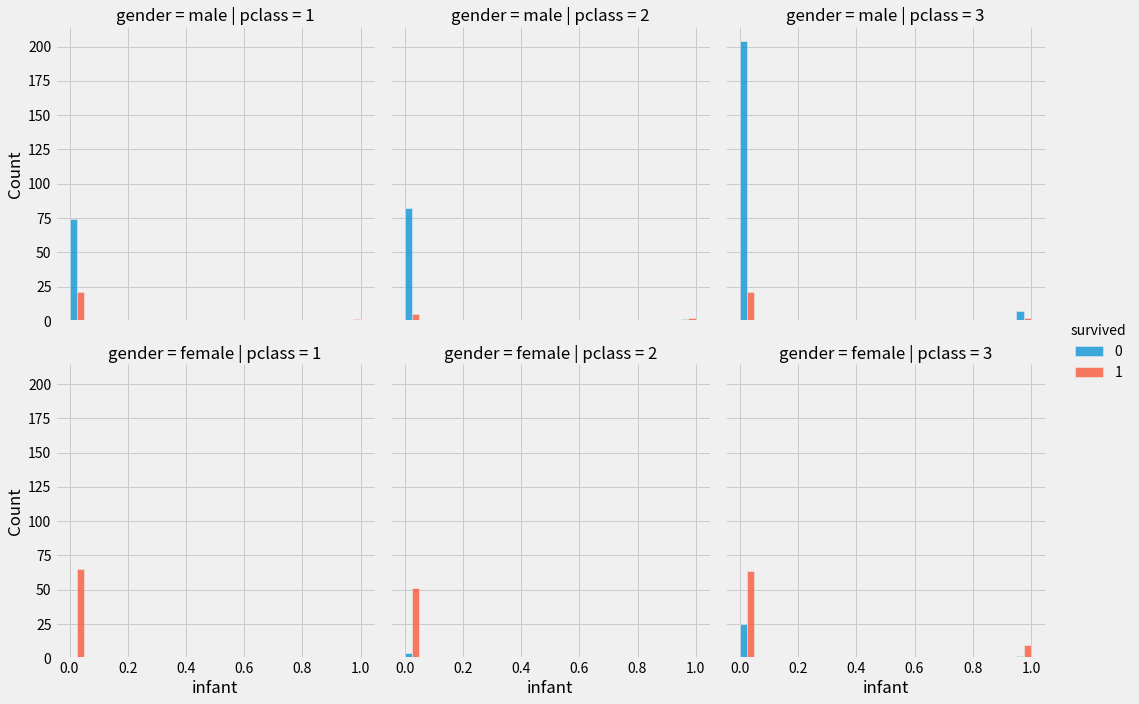

In [60]:
sns.displot(train, x="infant", hue="survived", multiple="dodge", bins=20, col='pclass',row='gender')
            # sns.displot(train, x="age", hue="survived", multiple="dodge", bins=20, col="pclass", row='gender')

## fare feature

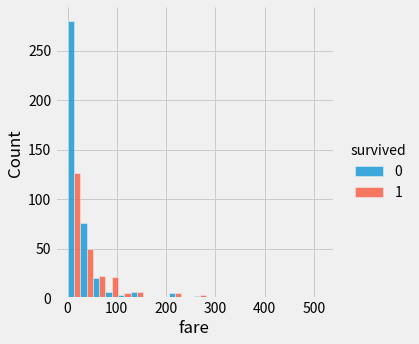

In [61]:
sns.displot(train, x="fare", hue="survived", multiple="dodge", bins=20)

In [62]:
c11 = train['fare'] <= 51
train.loc[c11]['survived'].mean() #fare 51보다 적은 사람들 생존 평균

0.3308270676691729

In [63]:
c12 = train['fare'] > 52
train.loc[c12]['survived'].mean() # fare 52보다 큰 사람들 생존 평균

0.6153846153846154

### fare_level

In [64]:
def fare_leval(fare):
    if fare <= 51   :
      result = 'low fare'
    else :
      result = 'high fare'
    return result

train['fare_leval'] = train['fare'].map(lambda x: fare_leval(x))
test['fare_leval'] = test['fare'].map(lambda x: fare_leval(x))
ori_te['fare_leval'] = ori_te['fare'].map(lambda x: fare_leval(x))


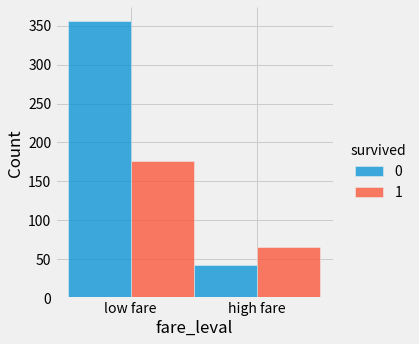

In [65]:
sns.displot(train, x="fare_leval", hue="survived", multiple="dodge", bins=20)

#### gender_fare_level

In [66]:
train['gender_fare_level'] = train.apply(lambda row: row['gender']+'_'+row['fare_leval'], axis=1)
test['gender_fare_level'] = test.apply(lambda row: row['gender']+'_'+row['fare_leval'], axis=1)
ori_te['gender_fare_level'] = ori_te.apply(lambda row: row['gender']+'_'+row['fare_leval'], axis=1)

print(f"{train['gender_fare_level'].nunique()} / \n {train['gender_fare_level'].unique()} \n")

4 / 
 ['male_low fare' 'female_high fare' 'female_low fare' 'male_high fare'] 



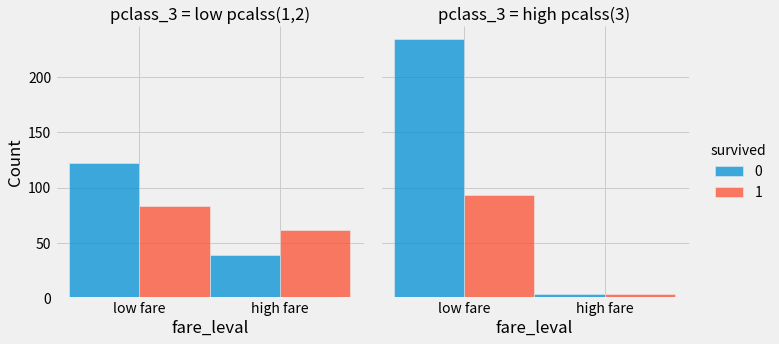

In [67]:
sns.displot(train, x="fare_leval", hue="survived", multiple="dodge", bins=20,col='pclass_3')

#### pclass_3_fare_level

In [68]:
train['pclass_3_fare_level'] = train.apply(lambda row: row['pclass_3']+'_'+row['fare_leval'], axis=1)
test['pclass_3_fare_level'] = test.apply(lambda row: row['pclass_3']+'_'+row['fare_leval'], axis=1)
ori_te['pclass_3_fare_level'] = ori_te.apply(lambda row: row['pclass_3']+'_'+row['fare_leval'], axis=1)

print(f"{train['pclass_3_fare_level'].nunique()} / \n {train['pclass_3_fare_level'].unique()} \n")

4 / 
 ['low pcalss(1,2)_low fare' 'low pcalss(1,2)_high fare'
 'high pcalss(3)_low fare' 'high pcalss(3)_high fare'] 



#### pclass_1_fare_level

In [69]:
train['pclass_1_fare_level'] = train.apply(lambda row: row['pclass_1']+'_'+row['fare_leval'], axis=1)
test['pclass_1_fare_level'] = test.apply(lambda row: row['pclass_1']+'_'+row['fare_leval'], axis=1)
ori_te['pclass_1_fare_level'] = ori_te.apply(lambda row: row['pclass_1']+'_'+row['fare_leval'], axis=1)

print(f"{train['pclass_1_fare_level'].nunique()} / \n {train['pclass_1_fare_level'].unique()} \n")

4 / 
 ['high pclass(1)_low fare' 'high pclass(1)_high fare'
 'low pcalss(2,3)_low fare' 'low pcalss(2,3)_high fare'] 



#### new_age_fare_level

In [70]:
train['new_age_fare_level'] = train.apply(lambda row: row['new_age']+'_'+row['fare_leval'], axis=1)
test['new_age_fare_level'] = test.apply(lambda row: row['new_age']+'_'+row['fare_leval'], axis=1)
ori_te['new_age_fare_level'] = ori_te.apply(lambda row: row['new_age']+'_'+row['fare_leval'], axis=1)

print(f"{train['new_age_fare_level'].nunique()} / \n {train['new_age_fare_level'].unique()} \n")

14 / 
 ['성인_low fare' '성인_high fare' '중년_low fare' '장년_low fare' '청소년_low fare'
 '청소년_high fare' '유아_low fare' '어린이_low fare' '중년_high fare'
 '장년_high fare' '노인_low fare' '어린이_high fare' '유아_high fare'
 '노인_high fare'] 



#### social_fare_level

In [71]:
train['social_fare_level'] = train.apply(lambda row: row['social']+'_'+row['fare_leval'], axis=1)
test['social_fare_level'] = test.apply(lambda row: row['social']+'_'+row['fare_leval'], axis=1)
ori_te['social_fare_level'] = ori_te.apply(lambda row: row['social']+'_'+row['fare_leval'], axis=1)

print(f"{train['social_fare_level'].nunique()} / \n {train['social_fare_level'].unique()} \n")

6 / 
 ['사회초년생_low fare' '사회초년생_high fare' '사회인_low fare' '어린_low fare'
 '어린_high fare' '사회인_high fare'] 



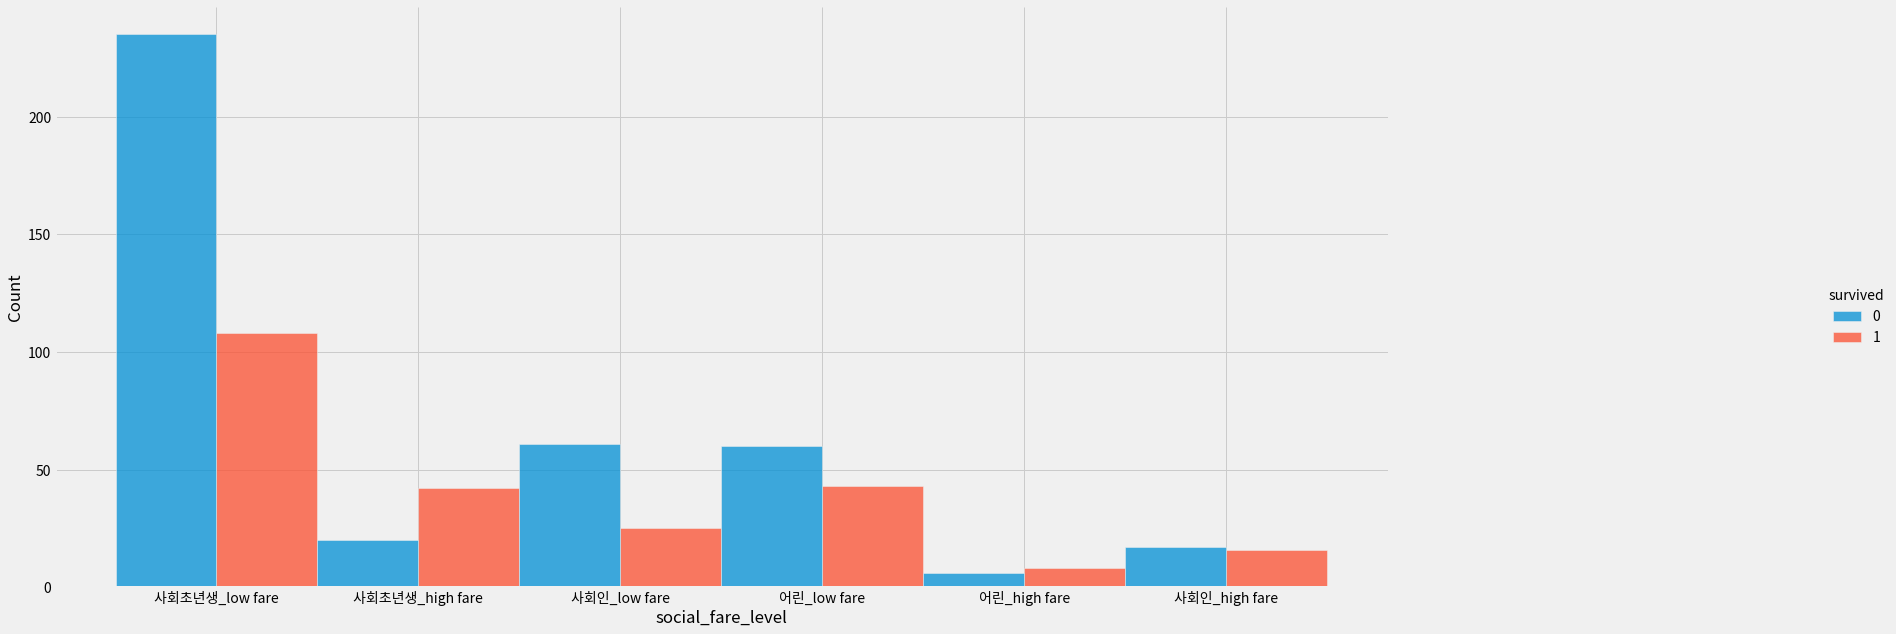

In [72]:
fig = sns.displot(train, x="social_fare_level", hue="survived", multiple="dodge", bins=20)
fig.fig.set_size_inches(30,10)

## sibsp , parch feature

### family

In [73]:
train['family'] = train['sibsp']+train['parch']+1
test['family'] = train['sibsp']+train['parch']+1
ori_te['family'] = train['sibsp']+train['parch']+1

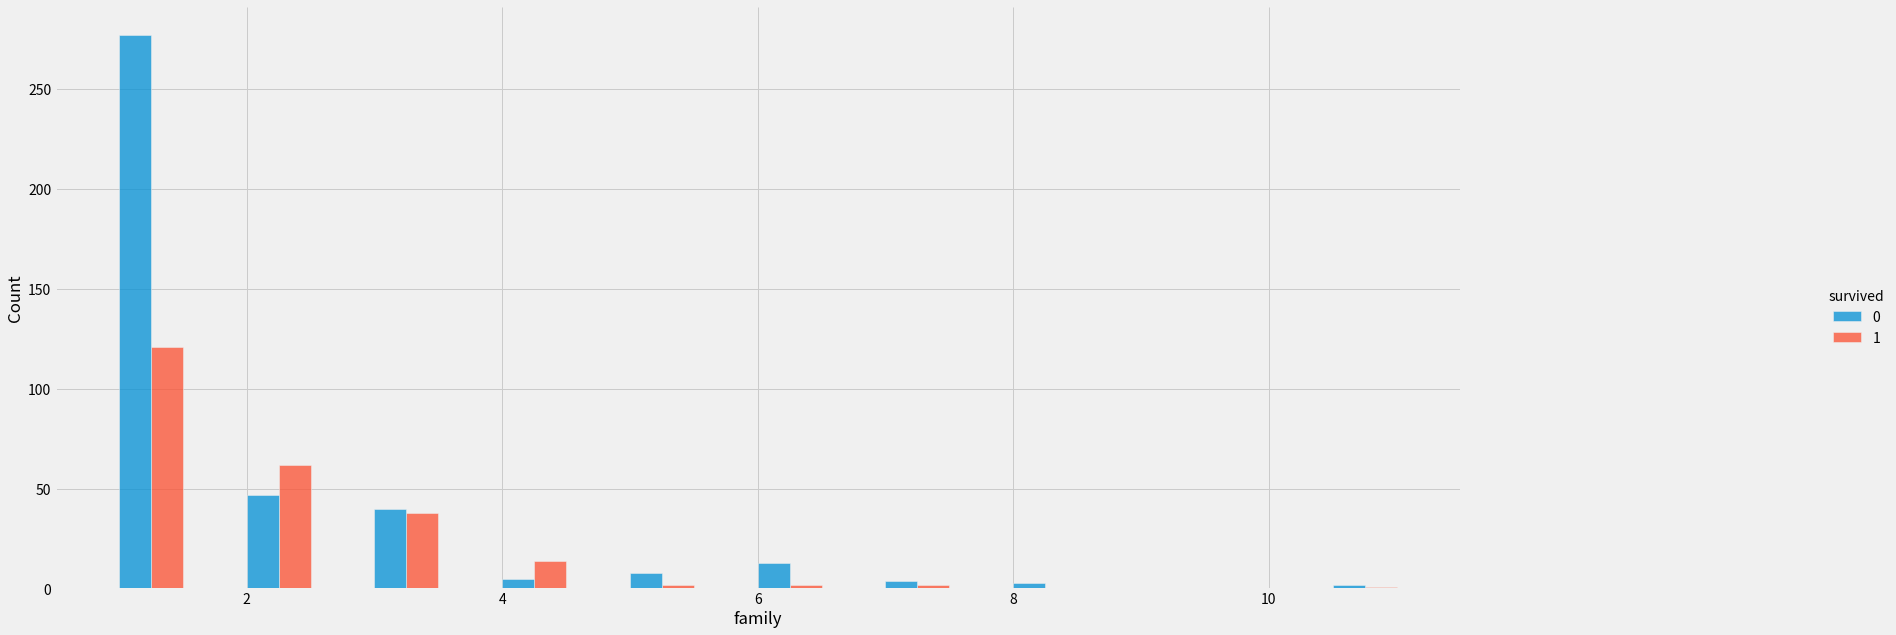

In [74]:
fig = sns.displot(train, x="family", hue="survived", multiple="dodge", bins=20)
fig.fig.set_size_inches(30,10)

#### family_size

In [75]:
def family_size(family):
    if family == 1   :
      result = 'lone family'
    elif (family >= 2) & (family <=4) :
      result = 'small family(2 or 4)'
    else:
      result = 'big family(3 or 5이상)'
    return result

train['family_size'] = train['family'].map(lambda x: family_size(x))
test['family_size'] = test['family'].map(lambda x: family_size(x))
ori_te['family_size'] = ori_te['family'].map(lambda x: family_size(x))


#### family_size2

In [76]:
def family_size2(family):
    if family == 1   :
      result = '가족x'
    else:
      result = '가족o'
    return result

train['family_size2'] = train['family'].map(lambda x: family_size2(x))
test['family_size2'] = test['family'].map(lambda x: family_size2(x))
ori_te['family_size2'] = ori_te['family'].map(lambda x: family_size2(x))

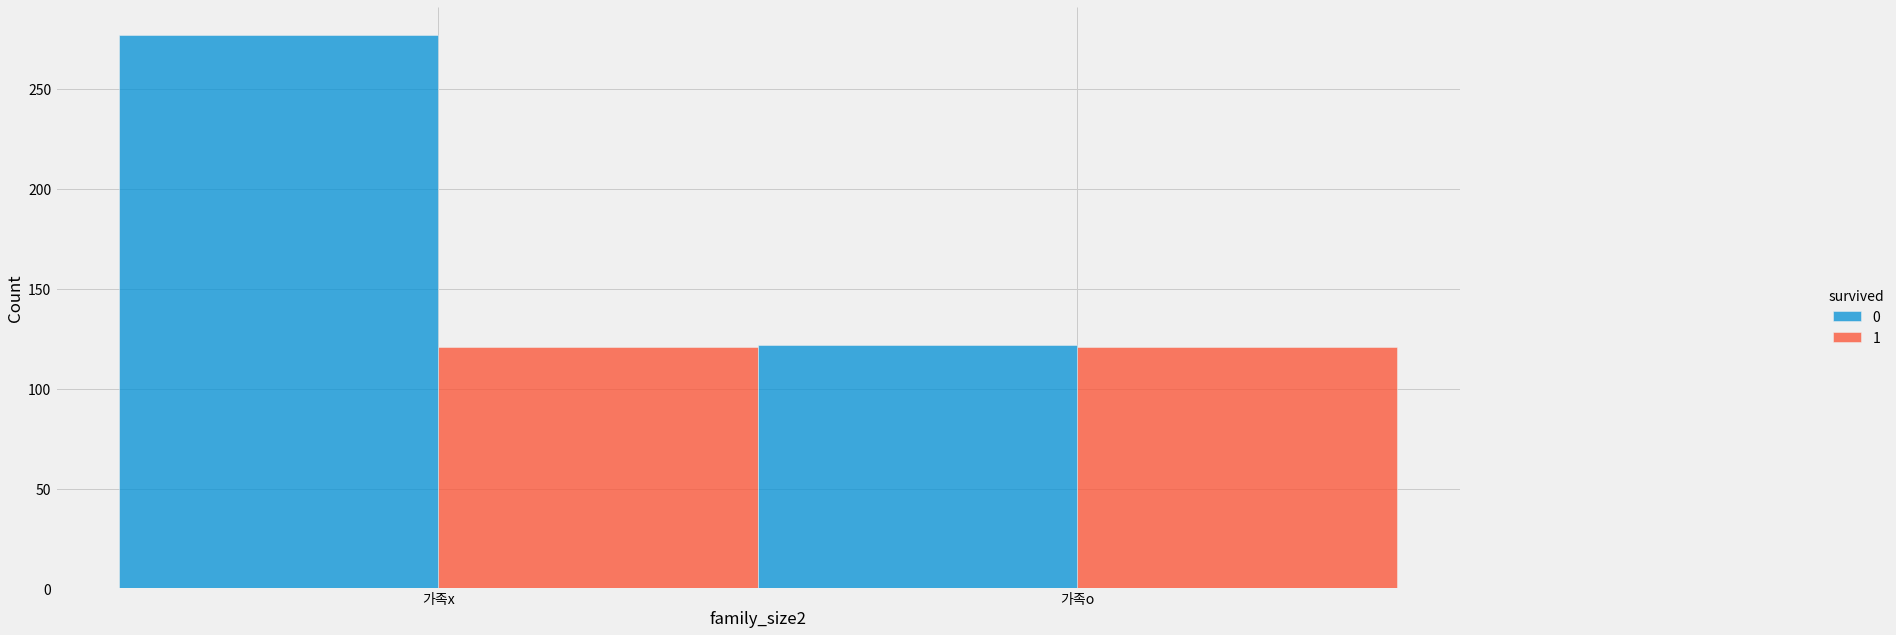

In [77]:
fig = sns.displot(train, x="family_size2", hue="survived", multiple="dodge", bins=20)
fig.fig.set_size_inches(30,10)

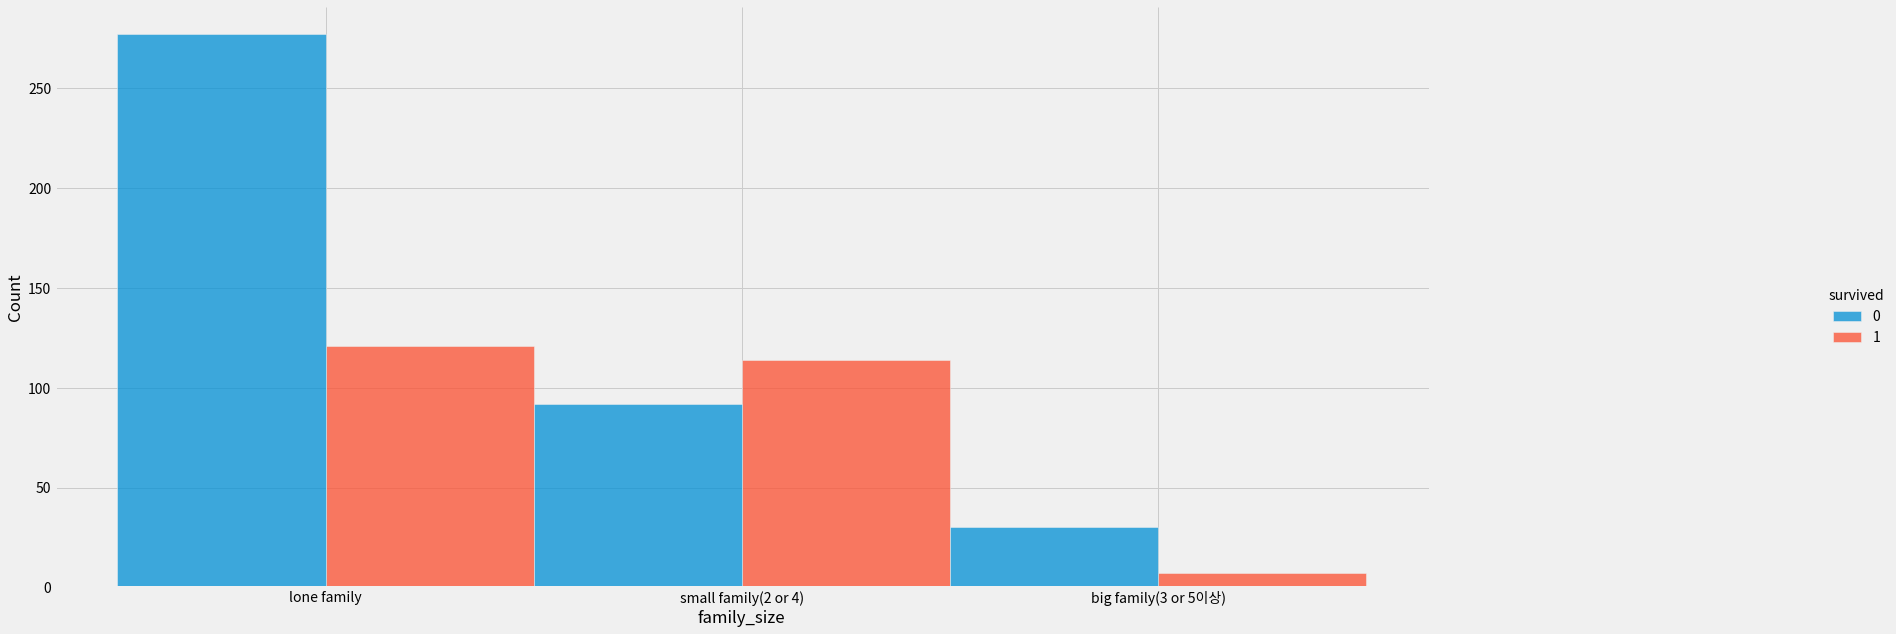

In [78]:
fig = sns.displot(train, x="family_size", hue="survived", multiple="dodge", bins=20)
fig.fig.set_size_inches(30,10)

#### general_family

In [79]:
def general_family(family):
    if (family ==2) or (family ==3) or (family ==4)  :
      result = 'general family'
    else :
      result = 'not general family'
    return result

train['general_family'] = train['family'].map(lambda x: general_family(x))
test['general_family'] = test['family'].map(lambda x: general_family(x))
ori_te['general_family'] = ori_te['family'].map(lambda x: general_family(x))


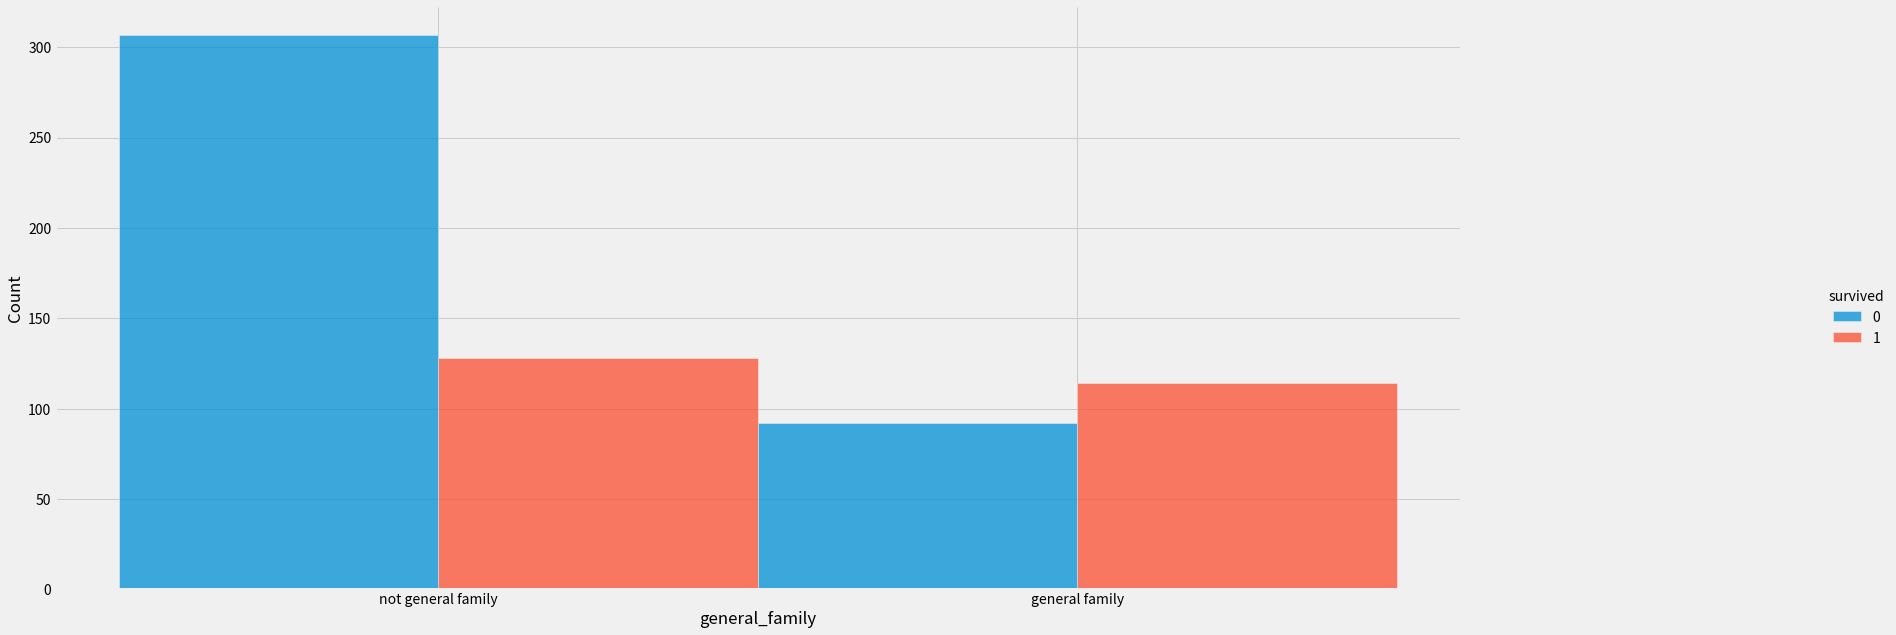

In [80]:
fig = sns.displot(train, x="general_family", hue="survived", multiple="dodge", bins=20)
fig.fig.set_size_inches(30,10)

### add_sibsp

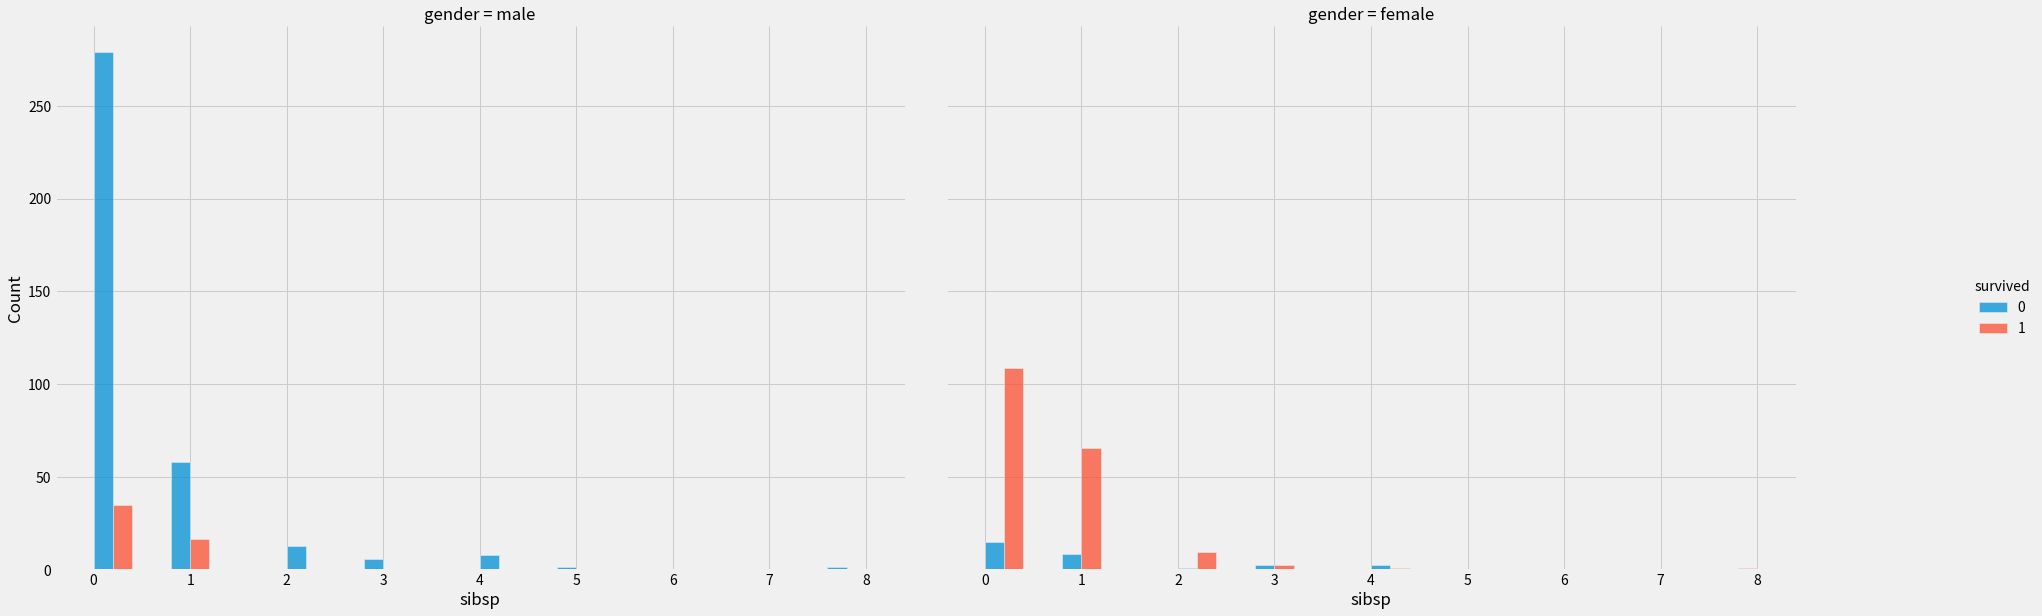

In [81]:
fig = sns.displot(train, x="sibsp", hue="survived", multiple="dodge", bins=20, col="gender")
fig.fig.set_size_inches(30,10)

In [82]:
def add_sibsp(sibsp):
  result = 'small sib'
  try:
    if sibsp >=2 :
      result = 'large sib'
  except:
    pass
  return result

train['sibsp_2_high'] = train['sibsp'].map(lambda x: add_sibsp(x))
test['sibsp_2_high'] = test['sibsp'].map(lambda x: add_sibsp(x))
ori_te['sibsp_2_high'] = ori_te['sibsp'].map(lambda x: add_sibsp(x))

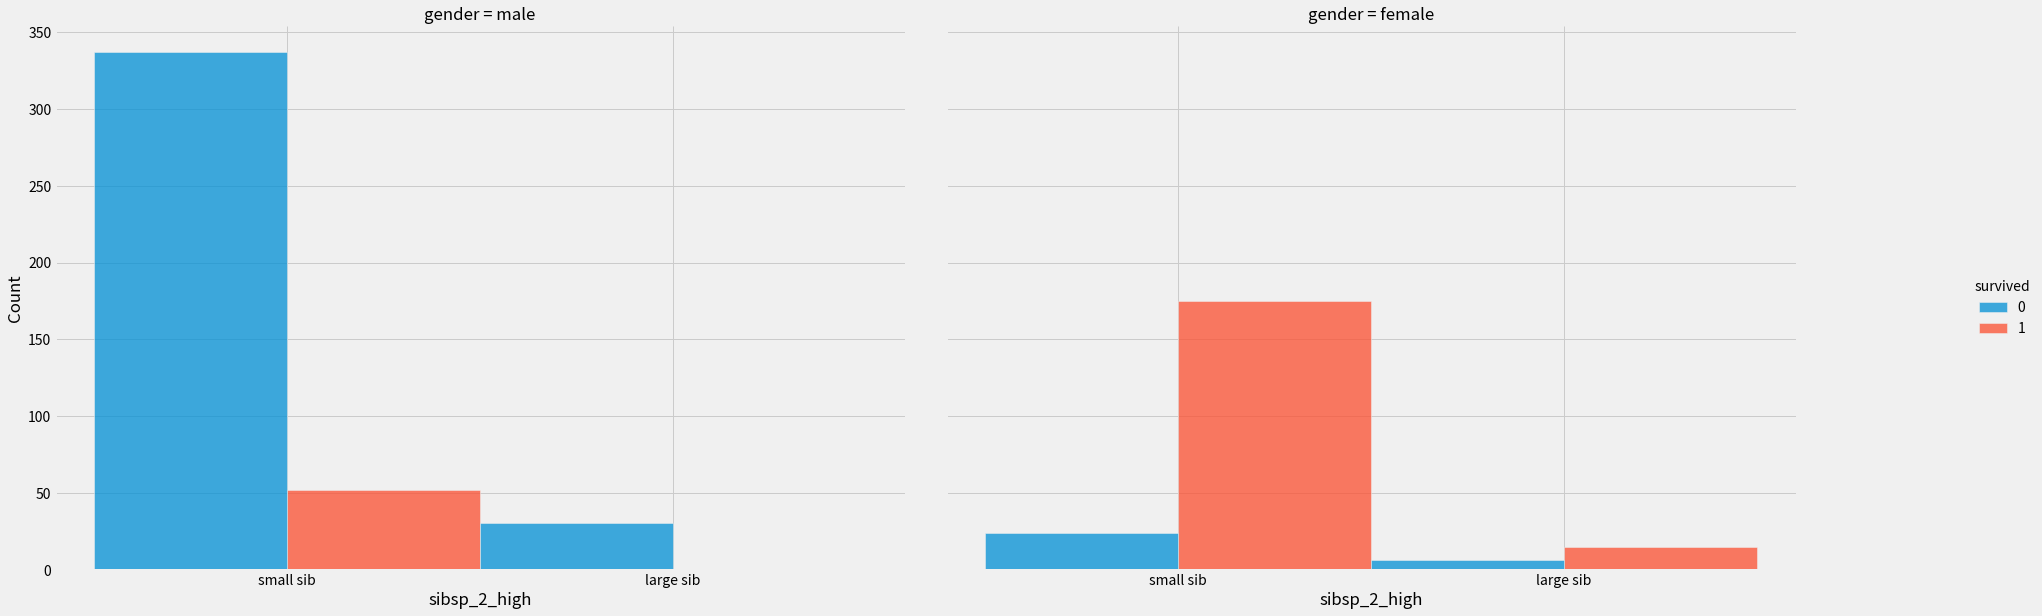

In [83]:
fig = sns.displot(train, x="sibsp_2_high", hue="survived", multiple="dodge", bins=20, col="gender")
fig.fig.set_size_inches(30,10)

#### sibsp_2_high_infant

In [84]:
train['sibsp_2_high_infant'] = train.apply(lambda row: row['sibsp_2_high']+'_'+str(row['infant']), axis=1)
test['sibsp_2_high_infant'] = test.apply(lambda row: row['sibsp_2_high']+'_'+str(row['infant']), axis=1)
ori_te['sibsp_2_high_infant'] = ori_te.apply(lambda row: row['sibsp_2_high']+'_'+str(row['infant']), axis=1)

#### sibsp_2_high_new_age

In [85]:
train['sibsp_2_high_new_age'] = train.apply(lambda row: row['sibsp_2_high']+'_'+row['new_age'], axis=1)
test['sibsp_2_high_new_age'] = test.apply(lambda row: row['sibsp_2_high']+'_'+row['new_age'], axis=1)
ori_te['sibsp_2_high_new_age'] = ori_te.apply(lambda row: row['sibsp_2_high']+'_'+row['new_age'], axis=1)

#### sibsp_2_high_gender

In [86]:
train['sibsp_2_high_gender'] = train.apply(lambda row: row['sibsp_2_high']+'_'+row['gender'], axis=1)
test['sibsp_2_high_gender'] = test.apply(lambda row: row['sibsp_2_high']+'_'+row['gender'], axis=1)
ori_te['sibsp_2_high_gender'] = ori_te.apply(lambda row: row['sibsp_2_high']+'_'+row['gender'], axis=1)

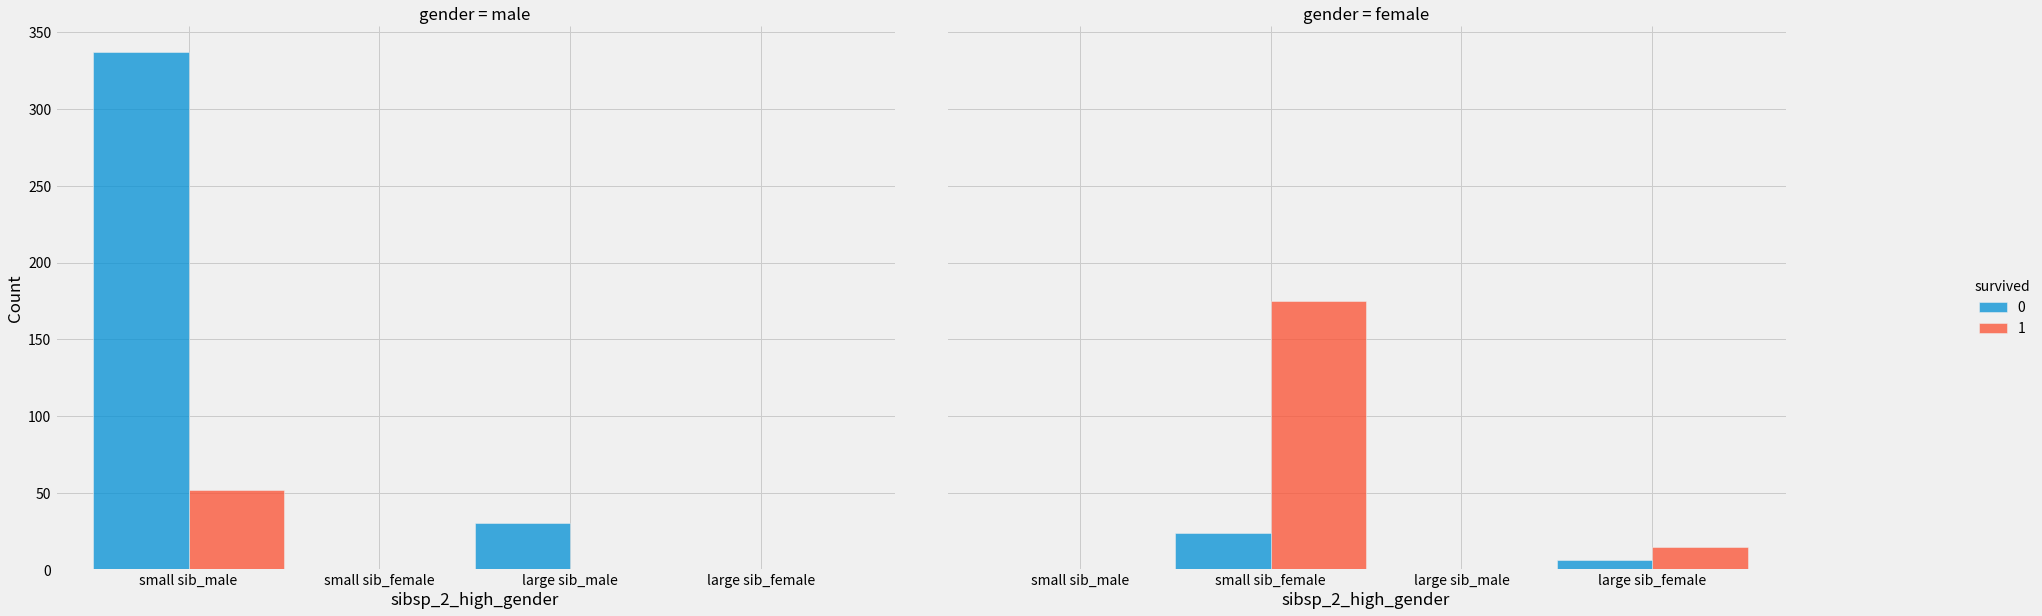

In [87]:
fig = sns.displot(train, x="sibsp_2_high_gender", hue="survived", multiple="dodge", bins=20, col="gender")
fig.fig.set_size_inches(30,10)

In [88]:
train['parch'].value_counts()

0    504
1     86
2     41
3      4
4      3
5      2
6      1
Name: parch, dtype: int64

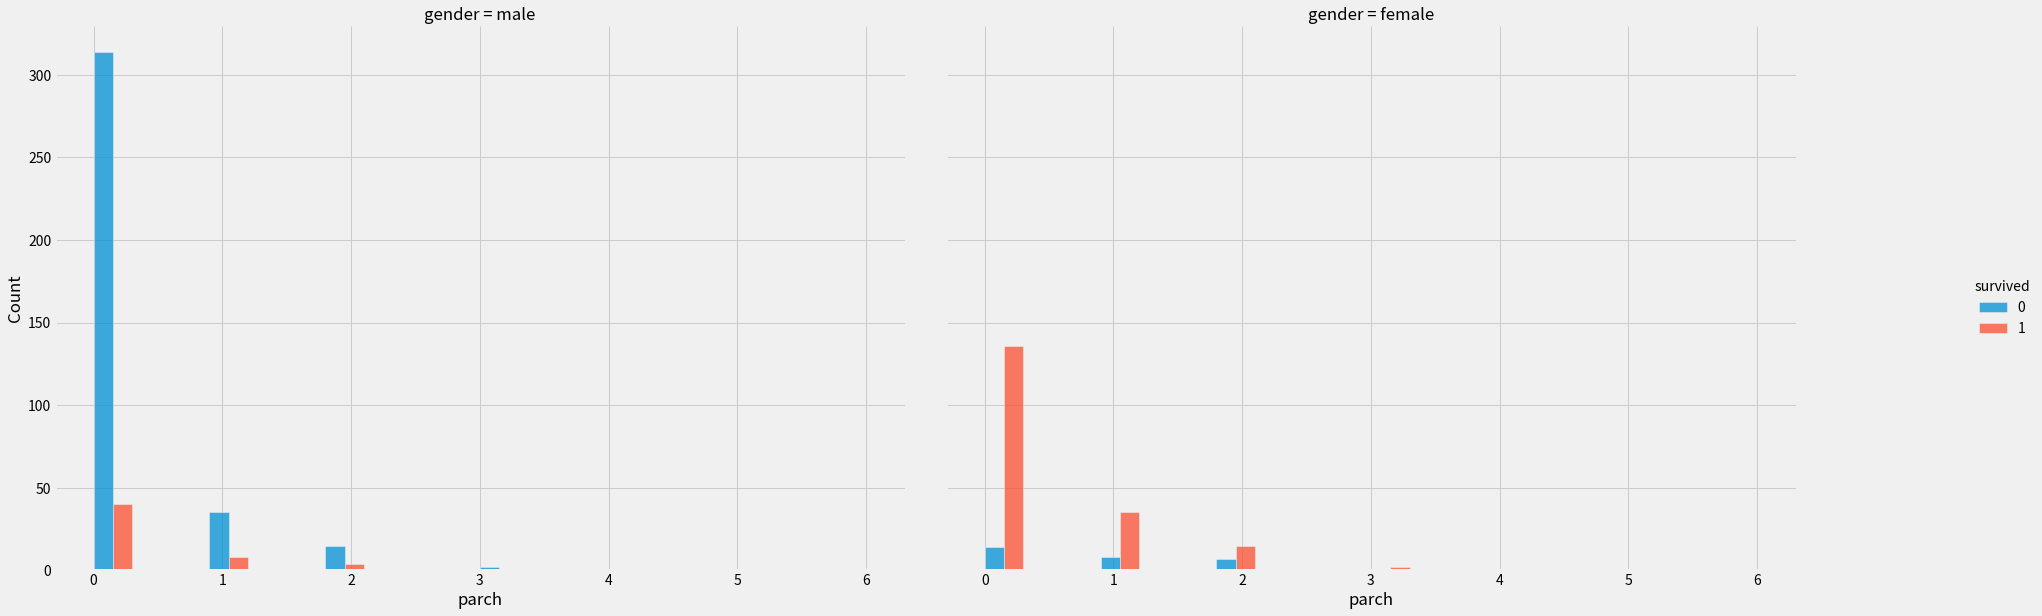

In [89]:
fig = sns.displot(train, x="parch", hue="survived", multiple="dodge", bins=20, col="gender")
fig.fig.set_size_inches(30,10)

## name

In [90]:
train['name']

0                           Klaber, Mr. Herman
1                     Young, Miss. Marie Grice
2                             Davies, Mr. Evan
3                            Kink, Mr. Vincenz
4                         Linehan, Mr. Michael
                        ...                   
636                   Salander, Mr. Karl Johan
637    Yasbeck, Mrs. Antoni (Selini Alexander)
638                  Van Impe, Miss. Catharina
639                         Giglio, Mr. Victor
640               Crosby, Capt. Edward Gifford
Name: name, Length: 641, dtype: object

### initial_name

In [91]:
train['initial_name'] = train['name'].str.split(',').str[1]
test['initial_name'] = test['name'].str.split(',').str[1]
ori_te['initial_name'] = ori_te['name'].str.split(',').str[1]

In [92]:
train['initial_name'] = train['initial_name'].str.split('.').str[0]
test['initial_name'] = test['initial_name'].str.split('.').str[0]
ori_te['initial_name'] = ori_te['initial_name'].str.split('.').str[0]

In [93]:
train['initial_name'].value_counts()

 Mr              371
 Miss            127
 Mrs              93
 Master           32
 Rev               5
 Dr                4
 Col               3
 Major             2
 Jonkheer          1
 the Countess      1
 Sir               1
 Capt              1
Name: initial_name, dtype: int64

In [94]:
train['initial_name'] = np.where(train['initial_name'].isin([' Mr',' Miss',' Mrs',' Master']), train['initial_name'], 'Others')
test['initial_name'] = np.where(test['initial_name'].isin([' Mr',' Miss',' Mrs',' Master']), test['initial_name'], 'Others')
ori_te['initial_name'] = np.where(ori_te['initial_name'].isin([' Mr',' Miss',' Mrs',' Master']), ori_te['initial_name'], 'Others')

In [95]:
train['initial_name'].value_counts()

 Mr        371
 Miss      127
 Mrs        93
 Master     32
Others      18
Name: initial_name, dtype: int64

#### marriage

In [96]:
def marriage(initial_name, sibsp):
  try:
    if ((initial_name ==' Mr')&(sibsp >=1)) or (initial_name== ' Mrs'):
      result = '결혼'
    elif ((initial_name == ' Mr')&(sibsp<1))or (initial_name==' Miss'):
      result = '미혼'
    else :
      result = 'others'
    
  except:
    pass
  return result

train['marriage'] = train.apply(lambda x: marriage(x['initial_name'],x['sibsp']),axis=1)
test['marriage'] = test.apply(lambda x: marriage(x['initial_name'],x['sibsp']),axis=1)
ori_te['marriage'] = ori_te.apply(lambda x: marriage(x['initial_name'],x['sibsp']),axis=1)

print(f"{train['marriage'].nunique()} / \n {train['marriage'].unique()} \n")
train.shape, test.shape, ori_te.shape

3 / 
 ['미혼' '결혼' 'others'] 



((641, 37), (275, 37), (393, 36))

In [97]:
train['marriage'].value_counts()

미혼        425
결혼        166
others     50
Name: marriage, dtype: int64

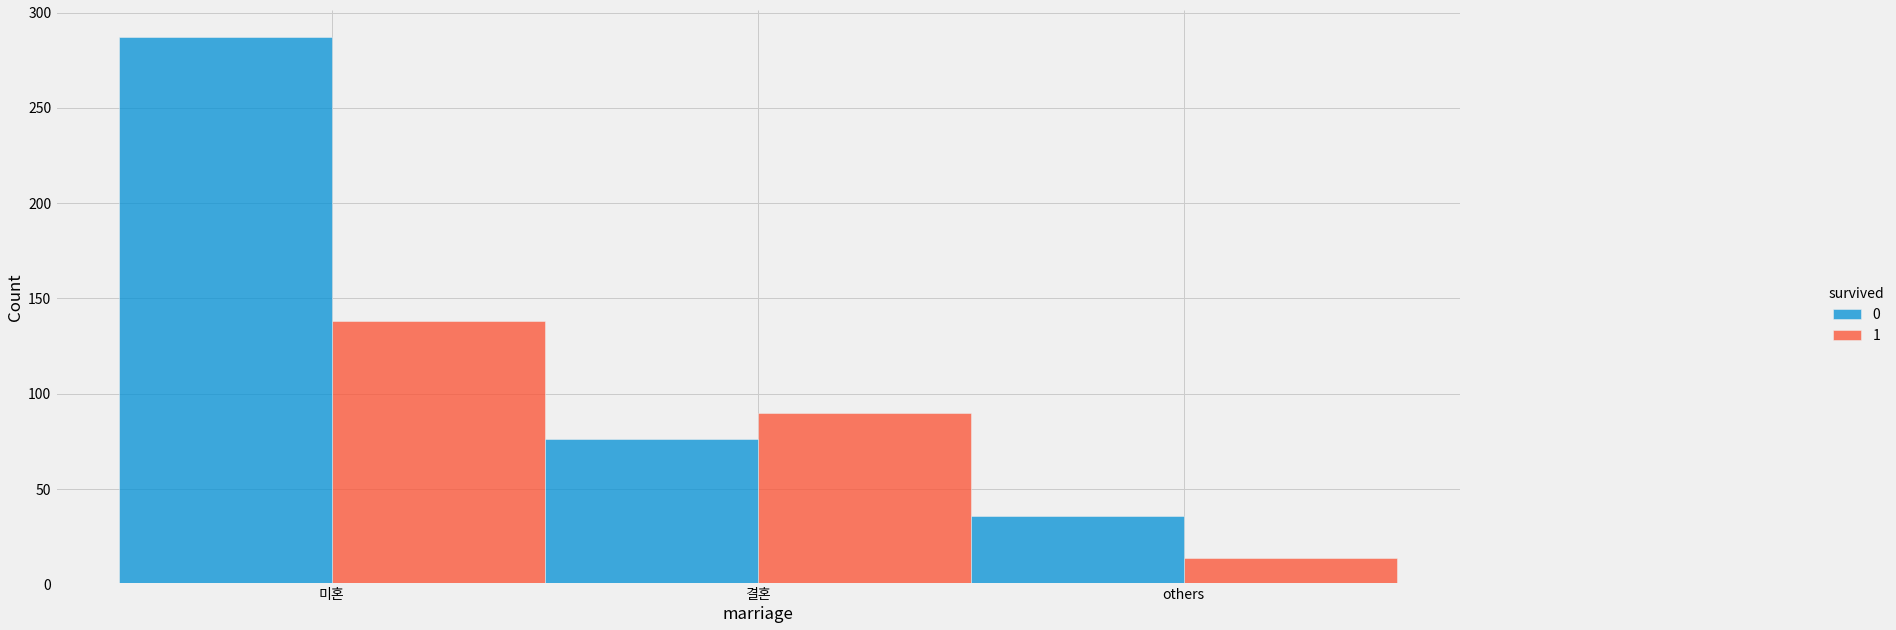

In [98]:
fig = sns.displot(train, x="marriage", hue="survived", multiple="dodge", bins=20)
fig.fig.set_size_inches(30,10)

#### marriage_pclass_3

In [99]:
train['marriage_pclass_3'] = train.apply(lambda row: row['marriage']+'_'+row['pclass_3'], axis=1)
test['marriage_pclass_3'] = test.apply(lambda row: row['marriage']+'_'+row['pclass_3'], axis=1)
ori_te['marriage_pclass_3'] = ori_te.apply(lambda row: row['marriage']+'_'+row['pclass_3'], axis=1)

In [100]:
train['marriage_pclass_3'].value_counts()

미혼_high pcalss(3)         250
미혼_low pcalss(1,2)        175
결혼_low pcalss(1,2)        106
결혼_high pcalss(3)          60
others_high pcalss(3)      25
others_low pcalss(1,2)     25
Name: marriage_pclass_3, dtype: int64

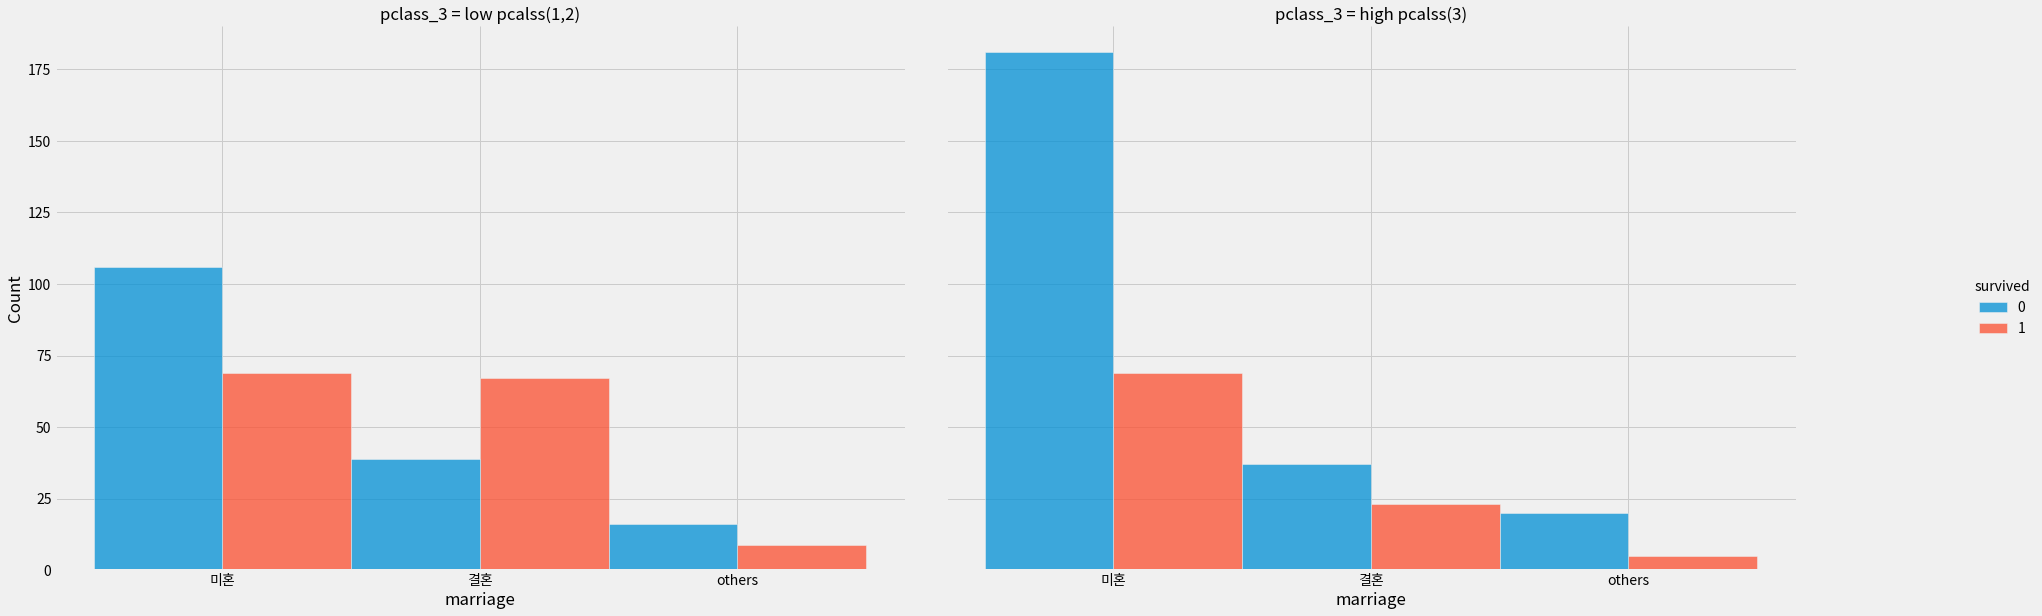

In [101]:
fig = sns.displot(train, x="marriage", hue="survived", multiple="dodge", bins=20,col='pclass_3')
fig.fig.set_size_inches(30,10)

### name_len

In [102]:
train['name_len'] = train['name'].map(lambda x : len(x))
test['name_len'] = test['name'].map(lambda x : len(x))
ori_te['name_len'] = ori_te['name'].map(lambda x : len(x))

train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,fare,embarked,...,family_size2,general_family,sibsp_2_high,sibsp_2_high_infant,sibsp_2_high_new_age,sibsp_2_high_gender,initial_name,marriage,marriage_pclass_3,name_len
0,539,0,1,"Klaber, Mr. Herman",male,28,0,0,26.5500,S,...,가족x,not general family,small sib,small sib_0,small sib_성인,small sib_male,Mr,미혼,"미혼_low pcalss(1,2)",18
1,339,1,1,"Young, Miss. Marie Grice",female,36,0,0,135.6333,C,...,가족x,not general family,small sib,small sib_0,small sib_성인,small sib_female,Miss,미혼,"미혼_low pcalss(1,2)",24
2,505,0,3,"Davies, Mr. Evan",male,22,0,0,8.0500,S,...,가족x,not general family,small sib,small sib_0,small sib_성인,small sib_male,Mr,미혼,미혼_high pcalss(3),16
3,492,0,3,"Kink, Mr. Vincenz",male,26,2,0,8.6625,S,...,가족o,general family,large sib,large sib_0,large sib_성인,large sib_male,Mr,결혼,결혼_high pcalss(3),17
4,897,0,3,"Linehan, Mr. Michael",male,28,0,0,7.8792,Q,...,가족x,not general family,small sib,small sib_0,small sib_성인,small sib_male,Mr,미혼,미혼_high pcalss(3),20


In [103]:
train['name_len'].value_counts()

18    42
25    42
26    39
19    38
24    35
20    34
21    33
28    31
27    30
17    27
22    26
30    26
23    21
31    21
29    18
15    15
16    15
33    13
32    13
44    11
47     9
37     9
39     8
41     8
46     7
38     7
40     6
36     6
35     6
45     5
51     5
43     4
34     4
48     3
42     3
14     3
54     2
49     2
12     2
52     2
53     1
58     1
59     1
82     1
13     1
56     1
67     1
50     1
55     1
57     1
Name: name_len, dtype: int64

#### name_len_group

In [104]:
c22 = train['name_len'] >= 27
train.loc[c22]['survived'].mean() # fare 52보다 큰 사람들 생존 평균

0.5298507462686567

In [105]:
c23 = train['name_len'] < 27
train.loc[c23]['survived'].mean() # fare 52보다 큰 사람들 생존 평균

0.2680965147453083

In [106]:
def name_len_group(name_len) :
  result = 0
  if name_len <=  20 :
    result = 0
  elif name_len > 20 and name_len <= 25 :
    result = 1
  elif name_len > 25 and name_len <= 31 :
    result = 2
  else :
    result = 3
  return result

train['name_len_group'] = train['name_len'].map(lambda x: name_len_group(x))
test['name_len_group'] = test['name_len'].map(lambda x: name_len_group(x))
ori_te['name_len_group'] = ori_te['name_len'].map(lambda x: name_len_group(x))


In [107]:
train['name_len_group'].value_counts()

0    177
2    165
1    157
3    142
Name: name_len_group, dtype: int64

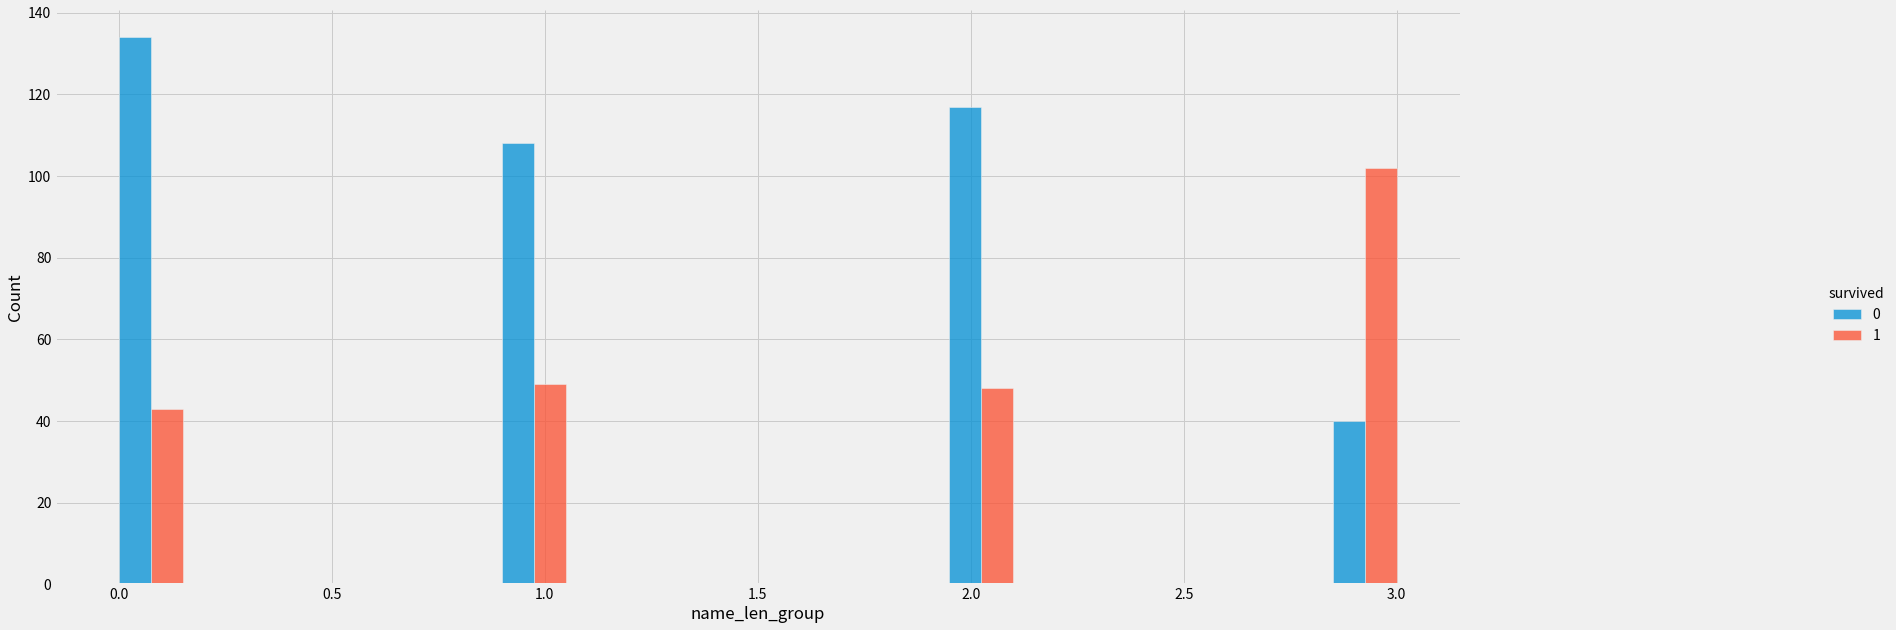

In [108]:
fig = sns.displot(train, x="name_len_group", hue="survived", multiple="dodge", bins=20)
fig.fig.set_size_inches(30,10)

## embarked

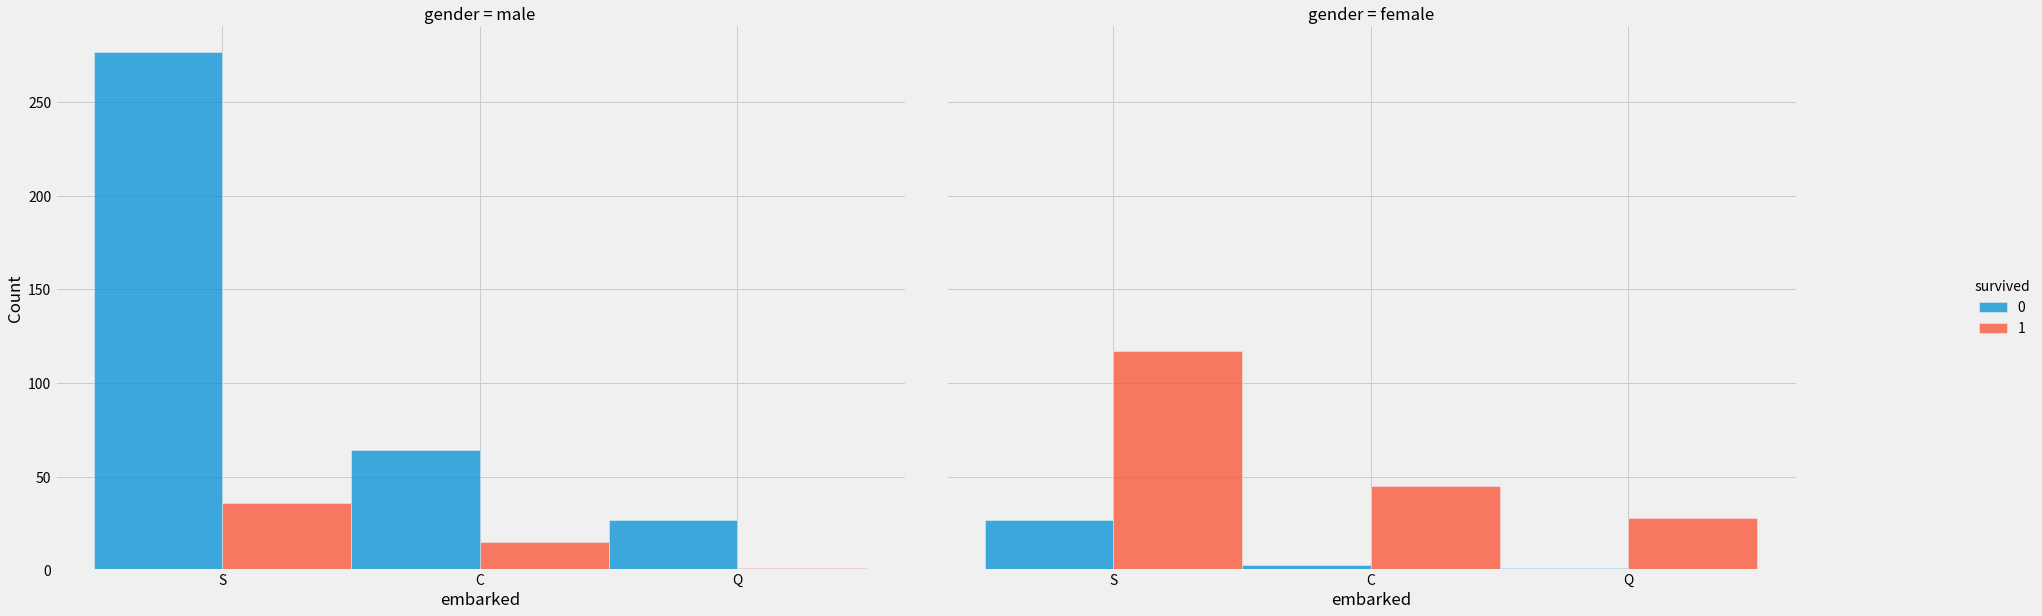

In [109]:
fig = sns.displot(train, x="embarked", hue="survived", multiple="dodge", bins=20,col='gender')
fig.fig.set_size_inches(30,10)

In [110]:
train.groupby('embarked').mean()

,passengerid,survived,pclass,age,sibsp,parch,fare,infant,family,name_len,name_len_group
embarked,,,,,,,,,,,
C,435.944882,0.472441,1.795276,30.858268,0.401575,0.314961,61.801805,0.031496,1.716535,27.314961,1.425197
Q,523.263158,0.508772,2.859649,27.771930,0.368421,0.035088,14.687793,0.017544,1.403509,22.649123,0.789474
S,461.923414,0.334792,2.330416,29.326039,0.533917,0.363239,25.795750,0.043764,1.897155,27.501094,1.503282


### embakred_gender

In [111]:
train['embarked_gender'] = train.apply(lambda row: row['embarked']+'_'+row['gender'], axis=1)
test['embarked_gender'] = test.apply(lambda row: row['embarked']+'_'+row['gender'], axis=1)
ori_te['embarked_gender'] = ori_te.apply(lambda row: row['embarked']+'_'+row['gender'], axis=1)

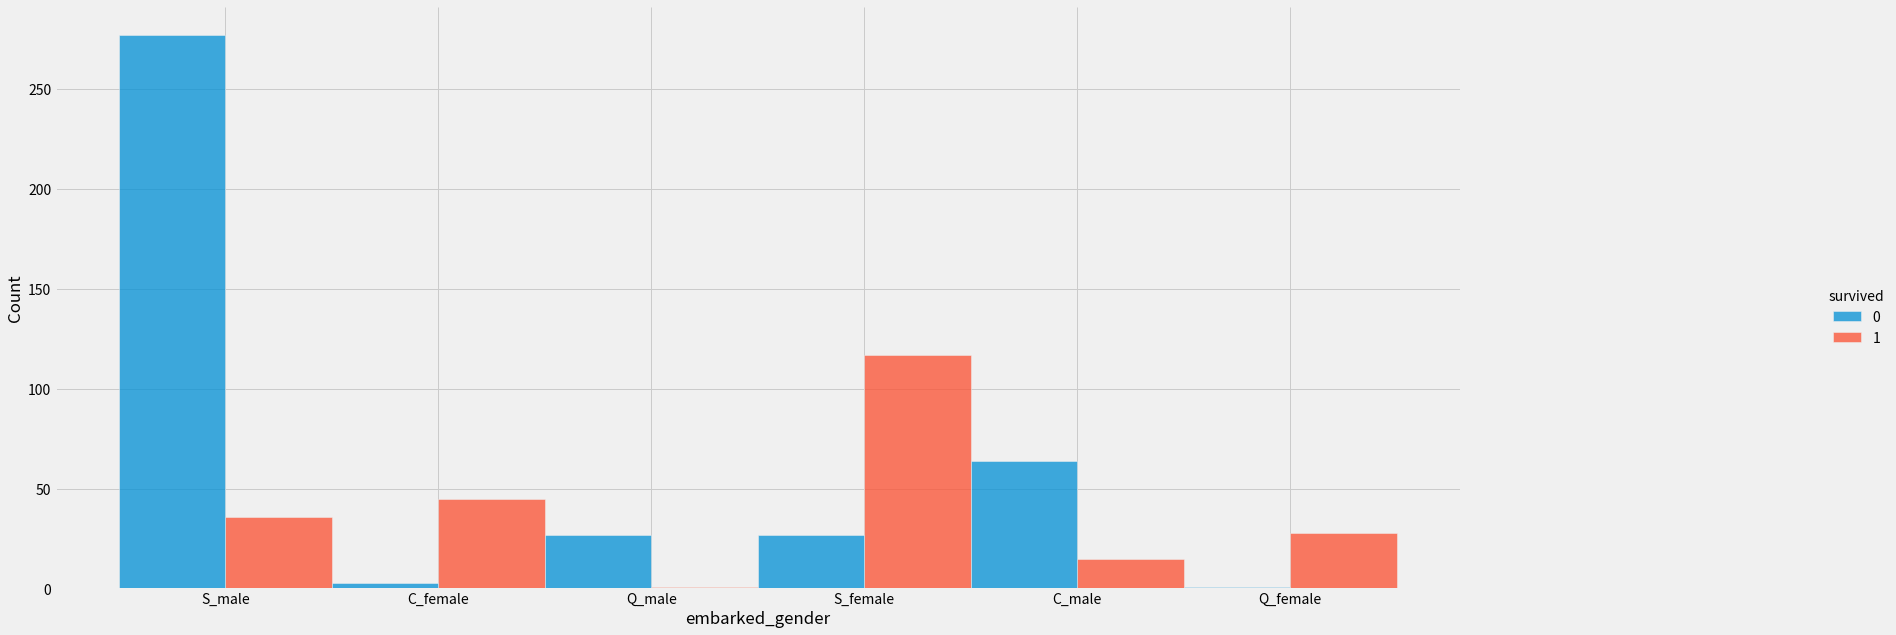

In [112]:
fig = sns.displot(train, x="embarked_gender", hue="survived", multiple="dodge")
fig.fig.set_size_inches(30,10)

### embakred_Q

In [113]:
def embarked_Q(embarked) :
  if embarked =='Q' :
    result = 'Q 탑승지'
  else:
    result = '그외 탑승지'
  return result

train['embarked_Q'] = train['embarked'].map(lambda x: embarked_Q(x))
test['embarked_Q'] = test['embarked'].map(lambda x: embarked_Q(x))
ori_te['embarked_Q'] = ori_te['embarked'].map(lambda x: embarked_Q(x))


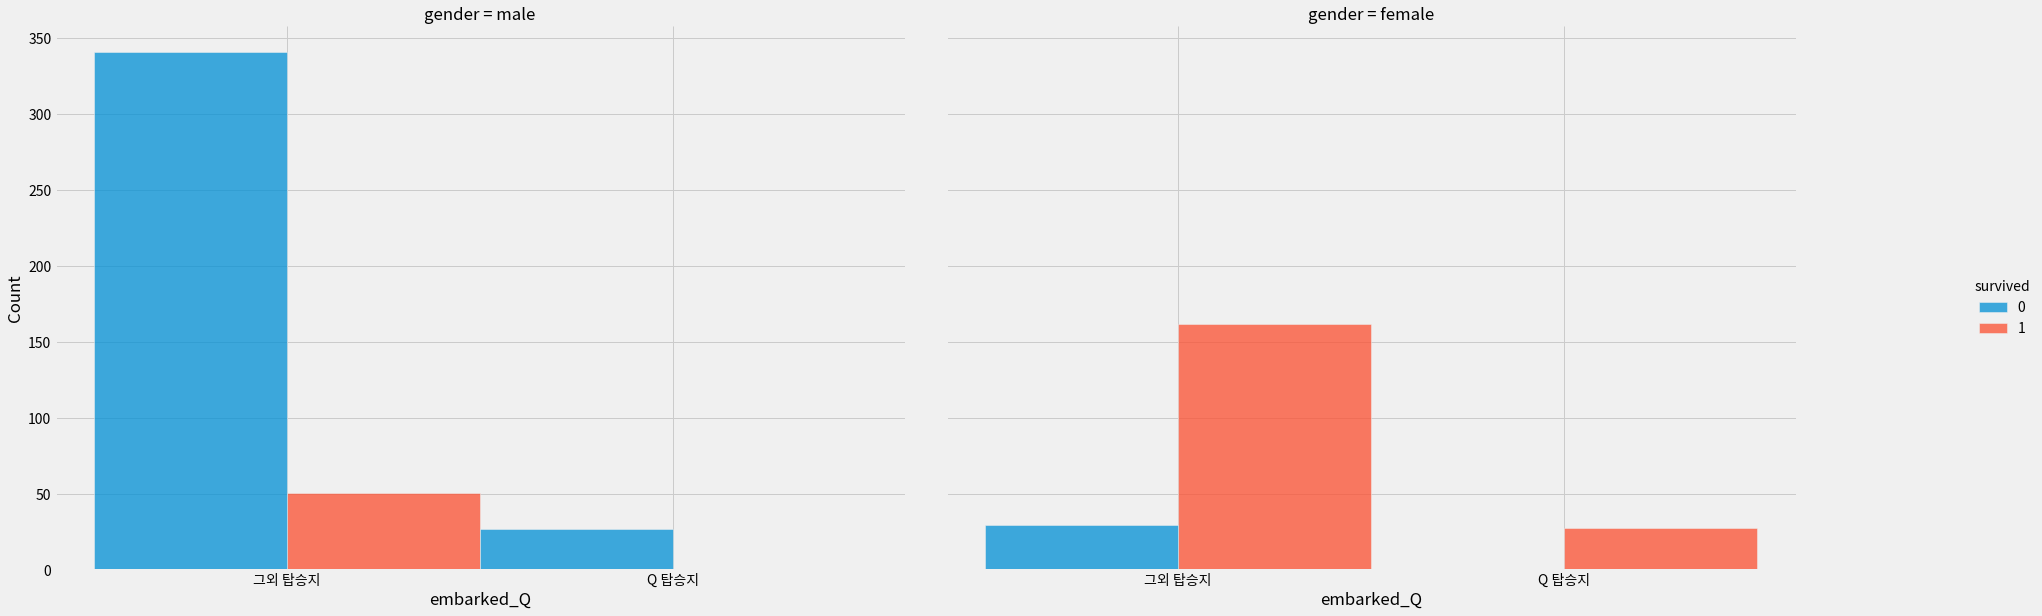

In [114]:
fig = sns.displot(train, x="embarked_Q", hue="survived", multiple="dodge",col='gender')
fig.fig.set_size_inches(30,10)

#### embarked_Q_gender

In [115]:
train['embarked_Q_gender'] = train.apply(lambda row: row['embarked_Q']+'_'+row['gender'], axis=1)
test['embarked_Q_gender'] = test.apply(lambda row: row['embarked_Q']+'_'+row['gender'], axis=1)
ori_te['embarked_Q_gender'] = ori_te.apply(lambda row: row['embarked_Q']+'_'+row['gender'], axis=1)

# modelling

## 분리

In [116]:
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'fare', 'embarked', 'social', 'new_age', 'gender_new_age',
       'pclass_new_age', 'infant', 'gender_infant', 'pclass_1',
       'pclass1_gender', 'pclass_3', 'pclass3_infant', 'pclass3_gender',
       'fare_leval', 'gender_fare_level', 'pclass_3_fare_level',
       'pclass_1_fare_level', 'new_age_fare_level', 'social_fare_level',
       'family', 'family_size', 'family_size2', 'general_family',
       'sibsp_2_high', 'sibsp_2_high_infant', 'sibsp_2_high_new_age',
       'sibsp_2_high_gender', 'initial_name', 'marriage', 'marriage_pclass_3',
       'name_len', 'name_len_group', 'embarked_gender', 'embarked_Q',
       'embarked_Q_gender'],
      dtype='object')

In [117]:
y_tr = train['survived']
X_tr = train.drop(['survived'], axis=1)

y_te = test['survived']
X_te = test.drop(['survived'], axis=1)

X_tr.shape, y_tr.shape, X_te.shape, y_te.shape

((641, 42), (641,), (275, 42), (275,))

In [118]:
X_tr.reset_index(drop=True , inplace=True)

In [119]:
X_tr.shape, y_tr.shape, X_te.shape, y_te.shape

((641, 42), (641,), (275, 42), (275,))

In [120]:
train = X_tr.copy()
test = X_te.copy()

In [121]:
train.drop(['passengerid','name'], axis=1, inplace=True)
test.drop(['passengerid','name'], axis=1, inplace=True)
ori_te.drop(['passengerid','name'], axis=1, inplace=True)

In [122]:
train.drop(['sibsp_2_high_new_age'], axis=1, inplace=True)
test.drop(['sibsp_2_high_new_age'], axis=1, inplace=True)
ori_te.drop(['sibsp_2_high_new_age'], axis=1, inplace=True)

## data encoding

In [123]:
from sklearn.preprocessing import OneHotEncoder

In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pclass               641 non-null    int64  
 1   gender               641 non-null    object 
 2   age                  641 non-null    int32  
 3   sibsp                641 non-null    int64  
 4   parch                641 non-null    int64  
 5   fare                 641 non-null    float64
 6   embarked             641 non-null    object 
 7   social               641 non-null    object 
 8   new_age              641 non-null    object 
 9   gender_new_age       641 non-null    object 
 10  pclass_new_age       641 non-null    object 
 11  infant               641 non-null    int64  
 12  gender_infant        641 non-null    object 
 13  pclass_1             641 non-null    object 
 14  pclass1_gender       641 non-null    object 
 15  pclass_3             641 non-null    obj

In [125]:
train.shape , test.shape , ori_te.shape

((641, 39), (275, 39), (393, 39))

In [126]:
enc_cols = list(train.select_dtypes(exclude=np.number).columns) # 범주형 
normal_cols = list(set(train.columns) - set(enc_cols))
normal_cols

['sibsp',
 'infant',
 'pclass',
 'fare',
 'age',
 'parch',
 'name_len_group',
 'family',
 'name_len']

In [127]:
enc = OneHotEncoder()

tmp_tr = pd.DataFrame(
    enc.fit_transform(train[enc_cols]).toarray(), #범주형 encoder 적용시켜서 temp_tr에 저장
    columns = enc.get_feature_names_out() # feature name을 뽑아냄 
)  
enc_tr = pd.concat(
    [train[normal_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
) 
# 수치형 데이터(train[normal_cols]) + encoding 된 문자형 데이터(tmp_tr) 를 합쳐서 enc_tr



# test (ori_te 에서 나온 te  -> 모델의 학습을 평가(잘했는지 못했는지))
tmp_te = pd.DataFrame(
    enc.transform(test[enc_cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_te = pd.concat(
    [test[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)


# ori_test
tmp_te = pd.DataFrame(
    enc.transform(ori_te[enc_cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_ori_te = pd.concat(
    [ori_te[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)
print(f'before: {train.shape} / {test.shape} / {ori_te.shape}')
print(f'after: {enc_tr.shape} / {enc_te.shape} / {enc_ori_te.shape}')

before: (641, 39) / (275, 39) / (393, 39)
after: (641, 156) / (275, 156) / (393, 156)


In [128]:
scaling_cols = ['age','name_len','parch','sibsp','family','pclass','fare','infant','name_len_group']
not_scaling_cols = list(set(enc_tr.columns) - set(scaling_cols))

from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
_scaled_tr = rbs.fit_transform(enc_tr[scaling_cols])
_scaled_te = rbs.transform(enc_te[scaling_cols])
_scaled_ori_te = rbs.transform(enc_ori_te[scaling_cols])

print(f'before: {enc_tr.shape} / {enc_te.shape}')
# train
tmp_tr = pd.DataFrame(
    _scaled_tr, 
    columns = scaling_cols
)
scaled_tr = pd.concat(
    [enc_tr[not_scaling_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)
# test
tmp_te = pd.DataFrame(
    _scaled_te, 
    columns = scaling_cols
)
scaled_te = pd.concat(
    [enc_te[not_scaling_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)
# ori_test
tmp_te = pd.DataFrame(
    _scaled_ori_te, 
    columns = scaling_cols
)
scaled_ori_te = pd.concat(
    [enc_ori_te[not_scaling_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)

print(f'after: {scaled_tr.shape} / {scaled_te.shape}')

before: (641, 156) / (275, 156)
after: (641, 156) / (275, 156)


In [129]:
scaled_tr.isnull().sum() , y_tr.isnull().sum()

(pclass_1_fare_level_high pclass(1)_high fare    0
 gender_new_age_female_노인                        0
 sibsp_2_high_gender_small sib_male              0
 new_age_유아                                      0
 gender_new_age_female_청소년                       0
                                                ..
 family                                          0
 pclass                                          0
 fare                                            0
 infant                                          0
 name_len_group                                  0
 Length: 156, dtype: int64,
 0)

## model4

In [130]:
from xgboost import XGBClassifier,plot_importance
from lightgbm import LGBMClassifier, plot_importance
from catboost import CatBoostClassifier

In [131]:
modelV4 = CatBoostClassifier(random_state=21)

modelV4.fit(scaled_tr,y_tr)

Learning rate set to 0.00852
0:	learn: 0.6854693	total: 138ms	remaining: 2m 17s
1:	learn: 0.6789952	total: 142ms	remaining: 1m 10s
2:	learn: 0.6724413	total: 147ms	remaining: 48.8s
3:	learn: 0.6658758	total: 154ms	remaining: 38.2s
4:	learn: 0.6592977	total: 158ms	remaining: 31.5s
5:	learn: 0.6536855	total: 163ms	remaining: 27s
6:	learn: 0.6471748	total: 167ms	remaining: 23.7s
7:	learn: 0.6411241	total: 172ms	remaining: 21.3s
8:	learn: 0.6346482	total: 177ms	remaining: 19.5s
9:	learn: 0.6281128	total: 183ms	remaining: 18.1s
10:	learn: 0.6222560	total: 188ms	remaining: 16.9s
11:	learn: 0.6169474	total: 193ms	remaining: 15.9s
12:	learn: 0.6114233	total: 198ms	remaining: 15s
13:	learn: 0.6057119	total: 203ms	remaining: 14.3s
14:	learn: 0.6003125	total: 208ms	remaining: 13.6s
15:	learn: 0.5954033	total: 213ms	remaining: 13.1s
16:	learn: 0.5901795	total: 218ms	remaining: 12.6s
17:	learn: 0.5847601	total: 224ms	remaining: 12.2s
18:	learn: 0.5798339	total: 229ms	remaining: 11.8s
19:	learn: 0.5

In [132]:
score_tr = modelV4.score(scaled_tr, y_tr)
score_te = modelV4.score(scaled_te, y_te) 

score_tr, score_te  

(0.9235569422776911, 0.8545454545454545)

In [133]:
from sklearn.metrics import roc_curve, auc 

y_pred = modelV4.predict_proba(scaled_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.904689608636977


In [134]:
df_feature_importances = pd.DataFrame(modelV4.feature_importances_, scaled_tr.columns).sort_values(by=[0], ascending=False).reset_index()
# print(f'{df_feature_importances.shape}')
df_feature_importances.head(30)

,index,0
0,gender_infant_male_0,9.910763
1,gender_male,8.286550
2,fare,6.723097
3,name_len,5.838240
4,gender_female,4.225867
5,sibsp_2_high_gender_small sib_female,4.129526
6,age,3.978516
7,initial_name_ Mr,3.593132
8,name_len_group,3.331795
9,pclass,2.531336


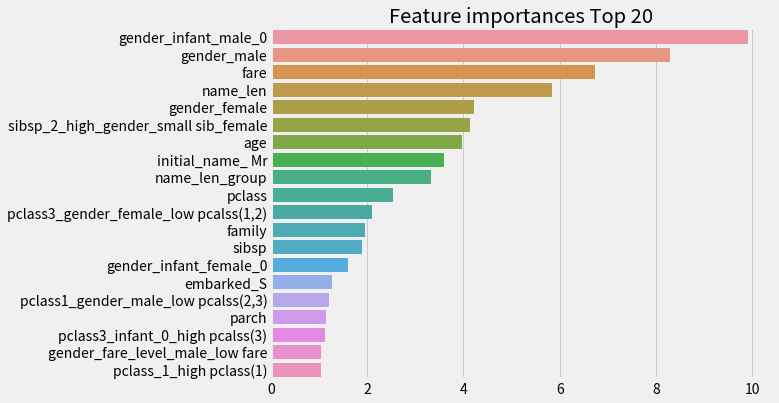

In [135]:
importances_values = modelV4.feature_importances_
importances = pd.Series(importances_values, index=scaled_tr.columns)
top20 = importances.sort_values(ascending=False).head(20)
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [136]:
top_index = top20.index

In [137]:
top_index

Index(['gender_infant_male_0', 'gender_male', 'fare', 'name_len',
       'gender_female', 'sibsp_2_high_gender_small sib_female', 'age',
       'initial_name_ Mr', 'name_len_group', 'pclass',
       'pclass3_gender_female_low pcalss(1,2)', 'family', 'sibsp',
       'gender_infant_female_0', 'embarked_S',
       'pclass1_gender_male_low pcalss(2,3)', 'parch',
       'pclass3_infant_0_high pcalss(3)', 'gender_fare_level_male_low fare',
       'pclass_1_high pclass(1)'],
      dtype='object')

## Model 5 

In [138]:
drop_tr = scaled_tr[['gender_female', 'gender_male', 'gender_infant_male_0', 'fare',
       'name_len', 'age', 'sibsp_2_high_gender_small sib_female',
       'name_len_group', 'initial_name_ Mr', 'pclass', 'sibsp',
       'pclass3_gender_female_low pcalss(1,2)', 'gender_infant_female_0',
       'family', 'embarked_S', 'pclass1_gender_male_low pcalss(2,3)',
       'pclass_1_high pclass(1)',
       'pclass_1_fare_level_low pcalss(2,3)_low fare',
       'pclass3_infant_0_low pcalss(1,2)', 'parch']]
drop_te = scaled_te[['gender_female', 'gender_male', 'gender_infant_male_0', 'fare',
       'name_len', 'age', 'sibsp_2_high_gender_small sib_female',
       'name_len_group', 'initial_name_ Mr', 'pclass', 'sibsp',
       'pclass3_gender_female_low pcalss(1,2)', 'gender_infant_female_0',
       'family', 'embarked_S', 'pclass1_gender_male_low pcalss(2,3)',
       'pclass_1_high pclass(1)',
       'pclass_1_fare_level_low pcalss(2,3)_low fare',
       'pclass3_infant_0_low pcalss(1,2)', 'parch']]
drop_ori_te = scaled_ori_te[['gender_female', 'gender_male', 'gender_infant_male_0', 'fare',
       'name_len', 'age', 'sibsp_2_high_gender_small sib_female',
       'name_len_group', 'initial_name_ Mr', 'pclass', 'sibsp',
       'pclass3_gender_female_low pcalss(1,2)', 'gender_infant_female_0',
       'family', 'embarked_S', 'pclass1_gender_male_low pcalss(2,3)',
       'pclass_1_high pclass(1)',
       'pclass_1_fare_level_low pcalss(2,3)_low fare',
       'pclass3_infant_0_low pcalss(1,2)', 'parch']]

In [139]:
from xgboost import XGBClassifier,plot_importance
from lightgbm import LGBMClassifier, plot_importance
from catboost import CatBoostClassifier

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [141]:
modelV5 = CatBoostClassifier(random_state=21)
modelV5.fit(drop_tr,y_tr)

Learning rate set to 0.00852
0:	learn: 0.6859050	total: 3.4ms	remaining: 3.39s
1:	learn: 0.6788960	total: 7.7ms	remaining: 3.84s
2:	learn: 0.6717718	total: 12.2ms	remaining: 4.06s
3:	learn: 0.6659127	total: 14.6ms	remaining: 3.63s
4:	learn: 0.6588074	total: 18ms	remaining: 3.59s
5:	learn: 0.6528221	total: 21.7ms	remaining: 3.59s
6:	learn: 0.6460857	total: 28.1ms	remaining: 3.98s
7:	learn: 0.6393615	total: 32.7ms	remaining: 4.06s
8:	learn: 0.6329540	total: 35.9ms	remaining: 3.96s
9:	learn: 0.6265245	total: 38.9ms	remaining: 3.85s
10:	learn: 0.6203965	total: 45.2ms	remaining: 4.06s
11:	learn: 0.6138993	total: 48.4ms	remaining: 3.98s
12:	learn: 0.6082573	total: 51.6ms	remaining: 3.92s
13:	learn: 0.6033873	total: 54.8ms	remaining: 3.86s
14:	learn: 0.5976197	total: 57.8ms	remaining: 3.8s
15:	learn: 0.5918905	total: 61.3ms	remaining: 3.77s
16:	learn: 0.5866263	total: 64.6ms	remaining: 3.74s
17:	learn: 0.5815146	total: 67.9ms	remaining: 3.71s
18:	learn: 0.5764340	total: 71ms	remaining: 3.67s


In [142]:
score_tr5 = modelV5.score(drop_tr, y_tr)
score_te5 = modelV5.score(drop_te, y_te) 

score_tr5, score_te5 

(0.9297971918876755, 0.8436363636363636)

In [143]:
from sklearn.metrics import roc_curve, auc 

y_pred5 = modelV5.predict_proba(drop_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred5)
auc_te5 = auc(fpr, tpr)
print(f'model: {auc_te5}')

model: 0.9071637426900585


In [144]:
drop_tr.shape , drop_te.shape , drop_ori_te.shape

((641, 20), (275, 20), (393, 20))

In [145]:
ori_te_pred5 = modelV5.predict_proba(drop_ori_te)[:,1]
ori_te_pred5.shape

(393,)

In [146]:
df_feature_importances5 = pd.DataFrame(modelV5.feature_importances_, drop_tr.columns).sort_values(by=[0], ascending=False).reset_index()

print(f'{df_feature_importances.shape}')
df_feature_importances

(156, 2)


,index,0
0,gender_infant_male_0,9.910763
1,gender_male,8.286550
2,fare,6.723097
3,name_len,5.838240
4,gender_female,4.225867
...,...,...
151,pclass_new_age_3_장년,0.000562
152,pclass_new_age_3_노인,0.000547
153,pclass_new_age_2_노인,0.000511
154,gender_new_age_female_노인,0.000256


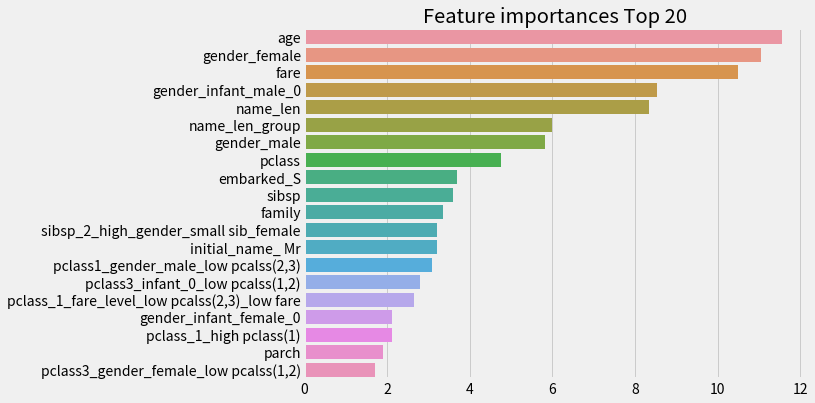

In [175]:
importances_values5 = modelV5.feature_importances_
importances5 = pd.Series(importances_values5, index=drop_tr.columns)
top20 = importances5.sort_values(ascending=False).
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [194]:
df_feature_importances.loc[10:30]

,index,0
10,"pclass3_gender_female_low pcalss(1,2)",2.108267
11,family,1.954498
12,sibsp,1.894861
13,gender_infant_female_0,1.603403
14,embarked_S,1.261893
15,"pclass1_gender_male_low pcalss(2,3)",1.209805
16,parch,1.136177
17,pclass3_infant_0_high pcalss(3),1.122871
18,gender_fare_level_male_low fare,1.047262
19,pclass_1_high pclass(1),1.035532


In [148]:
args.results

[]

In [149]:
results = []

In [150]:
args.results.append(
    {
        'Unnamed: 0' : 5 ,
        'model': 'modelV5',
        'score_tr': score_tr5,
        'score_te': score_te5,
        'auc_te': auc_te5,
        'ori_te_pred': ori_te_pred5,
        'len_features': drop_tr.shape[1],
        'feaute_importances': list(df_feature_importances5['index'].values[:drop_tr.shape[1]]),
        'create_dt': '0407'
    }
)

In [151]:
model5 = pd.DataFrame(args.results).sort_values(by=['auc_te'], ascending=False)
model5

,Unnamed: 0,model,score_tr,score_te,auc_te,ori_te_pred,len_features,feaute_importances,create_dt
0,5,modelV5,0.929797,0.843636,0.907164,"[0.9131775239408347, 0.9233761055750422, 0.947...",20,"[age, gender_female, fare, gender_infant_male_...",0407


In [152]:
df_results = pd.concat([model5,ori_result])
df_results

,Unnamed: 0,model,score_tr,score_te,auc_te,ori_te_pred,len_features,feaute_importances,create_dt
0,5.0,modelV5,0.929797,0.843636,0.907164,"[0.9131775239408347, 0.9233761055750422, 0.947...",20,"[age, gender_female, fare, gender_infant_male_...",0407
0,NaN,modelV6,0.921997,0.854545,0.912000,[0.93210988 0.92724436 0.9533418 0.08117021 0...,10,"['gender_female', 'gender_infant_male_0', 'gen...",407


In [153]:
df_results.reset_index(drop=True,inplace=True)

## model 6

In [154]:
top10 = importances5.sort_values(ascending=False).head(10)
top10

age                     11.554145
gender_female           11.052899
fare                    10.505256
gender_infant_male_0     8.538696
name_len                 8.339234
name_len_group           6.001540
gender_male              5.829786
pclass                   4.756044
embarked_S               3.687472
sibsp                    3.586545
dtype: float64

In [155]:
top10.index

Index(['age', 'gender_female', 'fare', 'gender_infant_male_0', 'name_len',
       'name_len_group', 'gender_male', 'pclass', 'embarked_S', 'sibsp'],
      dtype='object')

In [156]:
drop_tr2 = scaled_tr[['age', 'gender_female', 'fare', 'gender_infant_male_0', 'name_len',
       'name_len_group', 'gender_male', 'pclass', 'embarked_S', 'sibsp']]
drop_te2 = scaled_te[['age', 'gender_female', 'fare', 'gender_infant_male_0', 'name_len',
       'name_len_group', 'gender_male', 'pclass', 'embarked_S', 'sibsp']]
drop_ori_te2 = scaled_ori_te[['age', 'gender_female', 'fare', 'gender_infant_male_0', 'name_len',
       'name_len_group', 'gender_male', 'pclass', 'embarked_S', 'sibsp']]

In [157]:
from xgboost import XGBClassifier,plot_importance
from lightgbm import LGBMClassifier, plot_importance
from catboost import CatBoostClassifier

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [159]:
modelV6 = CatBoostClassifier(random_state=21)
modelV6.fit(drop_tr2,y_tr)

Learning rate set to 0.00852
0:	learn: 0.6857503	total: 2.71ms	remaining: 2.71s
1:	learn: 0.6781057	total: 6.78ms	remaining: 3.38s
2:	learn: 0.6708228	total: 11ms	remaining: 3.65s
3:	learn: 0.6652108	total: 13.2ms	remaining: 3.29s
4:	learn: 0.6583850	total: 17.3ms	remaining: 3.44s
5:	learn: 0.6514373	total: 21.4ms	remaining: 3.54s
6:	learn: 0.6445639	total: 27.3ms	remaining: 3.88s
7:	learn: 0.6381418	total: 31.8ms	remaining: 3.94s
8:	learn: 0.6323933	total: 34.6ms	remaining: 3.81s
9:	learn: 0.6271562	total: 38.5ms	remaining: 3.81s
10:	learn: 0.6208698	total: 41.8ms	remaining: 3.76s
11:	learn: 0.6154000	total: 45ms	remaining: 3.7s
12:	learn: 0.6107724	total: 47.1ms	remaining: 3.58s
13:	learn: 0.6044173	total: 50.8ms	remaining: 3.58s
14:	learn: 0.5988427	total: 52.9ms	remaining: 3.48s
15:	learn: 0.5931416	total: 56.3ms	remaining: 3.46s
16:	learn: 0.5886578	total: 58.7ms	remaining: 3.39s
17:	learn: 0.5831370	total: 62.1ms	remaining: 3.39s
18:	learn: 0.5780310	total: 65.2ms	remaining: 3.37

In [160]:
score_tr6 = modelV6.score(drop_tr2, y_tr)
score_te6 = modelV6.score(drop_te2, y_te) 

score_tr6, score_te6 

(0.921996879875195, 0.8545454545454545)

In [161]:
from sklearn.metrics import roc_curve, auc 

y_pred6 = modelV6.predict_proba(drop_te2)[:,1]
fpr6, tpr6, thresholds = roc_curve(y_te,y_pred6)
auc_te6 = auc(fpr6, tpr6)
print(f'model: {auc_te6}')

model: 0.9119995501574448


In [162]:
drop_tr2.shape , drop_te2.shape , drop_ori_te2.shape

((641, 10), (275, 10), (393, 10))

In [163]:
ori_te_pred6 = modelV6.predict_proba(drop_ori_te2)[:,1]
ori_te_pred6.shape

(393,)

In [164]:
df_feature_importances6 = pd.DataFrame(modelV6.feature_importances_, drop_tr2.columns).sort_values(by=[0], ascending=False).reset_index()

print(f'{df_feature_importances6.shape}')
df_feature_importances6

(10, 2)


,index,0
0,gender_female,14.029576
1,gender_infant_male_0,13.358824
2,gender_male,13.015273
3,pclass,12.420449
4,fare,11.505016
5,age,11.214081
6,name_len,8.225940
7,name_len_group,6.168212
8,sibsp,5.464661
9,embarked_S,4.597968


In [165]:
X_tr_pred = modelV6.predict(drop_tr2)

In [166]:
from sklearn.metrics import classification_report

print(classification_report(y_tr,X_tr_pred)) # tr

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       399
           1       0.94      0.85      0.89       242

    accuracy                           0.92       641
   macro avg       0.93      0.91      0.92       641
weighted avg       0.92      0.92      0.92       641



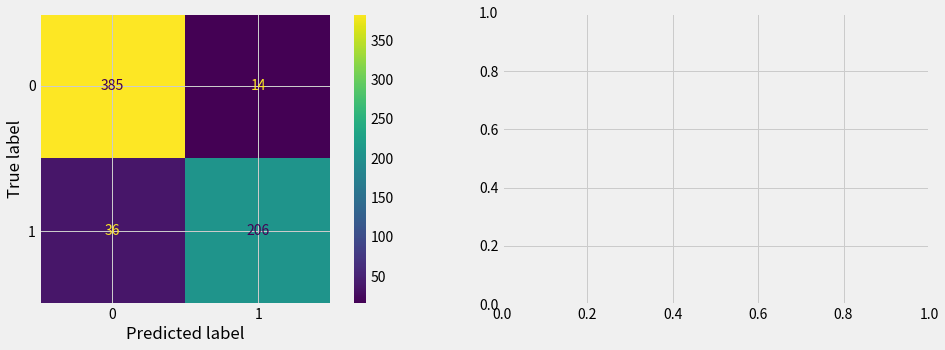

In [167]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig , ax = plt.subplots(1,2,figsize=(15,5))

cm = confusion_matrix(y_tr,X_tr_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[0])

plt.show()

# submission

In [168]:
# args.results.append(
#     {
#         'model': 'modelV6',
#         'score_tr': score_tr6,
#         'score_te': score_te6,
#         'auc_te': auc_te6,
#         'ori_te_pred': ori_te_pred6,
#         'len_features': drop_tr2.shape[1],
#         'feaute_importances': list(df_feature_importances6['index'].values[:drop_tr2.shape[1]]),
#         'create_dt': '0407'
#     }
# )

In [169]:
# df_results = pd.DataFrame(args.results)
# df_results

In [170]:
# submission = pd.read_csv(args.default_submission_csv)
# submission.head(2)

In [171]:
# submission['survived'] = df_results.loc[0, ['ori_te_pred']].values[0] # 인덱스 2번에 헤당하는 ori_te_pred 뽑고 values는 array를 하나 풀어주기 위한 용도
# print(f'{submission.isnull().sum().sum()}')
# submission.head()

In [172]:
# submission.to_csv(args.submission_csv, header=True, index=False) # 앞에서 지정한 submission_0407.csv로 저장된다

In [173]:
# df_results.to_csv(args.save_results,header=True,index=False)